<center><b><font style="color: orange" size="5">BE: 1 & 2: Thesholding and Mathematical Morphology</font></b></center>
&ensp;

> <left><b><font style="color: blue" size="5"> Deadline: </font></b></center> &ensp;  <left><b><font style="color: red" size="5"> **28/02/2025 latest at 23h59**</font></b></center> &ensp;

 

__Corresponding Teacher__: Dawood AL CHANTI, MCF, PHELMA.

__Email__: dawood.al-chanti@grenoble-inp.fr


-------------------------

> <left><b><font style="color: blue" size="3"> Student Information: </font></b></center> &ensp;


* Student 1:
    - Last Name:
    - First Name:
    - Identifier/algan:
    
* Student 2:
    - Last Name:
    - First Name:
    - Identifier/algan:

-------------------------

> <left><b><font style="color: blue" size="3"> Working in pairs or alone. </font></b></center> &ensp;


* **To upload your work, follow the following steps:**
    - Go to https://chamilo.grenoble-inp.fr/ 
    - Go to the course `4PMSTIA5 Traitement d'images avancé`
        - Go to the section Travaux d'étudiants
        - Upload your work under `BE: séance 1`
        - **You must upload this `.ipynb` as it is, which will contain your code and your comments/analysis.**
            - **Any other formate, will not be corrected.**
            
            

> <left><b><font style="color: red" size="3">Important: </font></b></center> &ensp; <center><b><font style="color: red" size="3"> 
    
- **Consider delievering a clean notebook, that contain the meaningful experimental results and analysis. Remove other experiments that you performed, which you considered as just trial.**
 


------------------

 

<center><b><font style="color: green" size="5">Brief Introduction to Jupyter Notebook, so that you can organize your comment and analysis</font></b></center>
&ensp;



Jupyter Notebook is an interactive environment where you can write and execute Python code, create visualizations, and add formatted text.

---

##  **1. Running a Cell**  
To execute a cell in Jupyter Notebook:

1. **Click on a cell** to select it.
2. **Press `Shift + Enter`** to run the cell and move to the next one.  
   🔹 _If it's the last cell, a new one is created below._
3. **Press `Ctrl + Enter`** to run the cell but stay on the same cell.  
4. You can also click the **Run** ▶️ button in the toolbar.

---

##  **2. Adding a Markdown Cell**
Markdown cells allow you to add formatted text, images, and LaTeX equations. **For example you can use such cells to write down your analysis and interpretations.**

### **Steps to Add a Markdown Cell:**
1. Click on an existing cell.
2. Press **`Esc + M`** to convert it to Markdown mode.
3. Type your formatted text.
4. Run the cell using **`Shift + Enter`** to render the Markdown.

 

--------------

# Import or Install certain libraries using command line or using Jupyter notebook

* To install OpenCV (cv2) for example, use the following method within jupyter notebook:
    * !pip install opencv-python
        * Once installed, you should restart your kernel so the modification is taken into account.
        * Once installed, change the cell from code to Markdown so that you do not install it again each time.

    
* Or, if you're using the command line, simply type
    * pip install opencv-python



**Remark**: Once installed, please restart your kernal and do not re-install them! just comment the installation as markdown to avoid running them.

--------------

pip install opencv-python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io as skio

In [2]:
import numpy as np
import glob
import cv2
import matplotlib.pyplot as plt
from skimage import io, color, morphology, filters
from skimage.morphology import diamond,disk,square, remove_small_objects, remove_small_holes,opening,closing,dilation,erosion

In [3]:
import os

# Uses all CPU cores in your computer or Phelma Machines
os.environ["OMP_NUM_THREADS"] = str(os.cpu_count())  
os.environ["OPENBLAS_NUM_THREADS"] = str(os.cpu_count())
os.environ["MKL_NUM_THREADS"] = str(os.cpu_count())
os.environ["VECLIB_MAXIMUM_THREADS"] = str(os.cpu_count())
os.environ["NUMEXPR_NUM_THREADS"] = str(os.cpu_count())


> <left><b><font style="color: blue" size="3"> Please read carefully before start coding any remark or hint that is given to you.</font></b></center> &ensp;


# Problem 1: Binary Morphological Analysis
- The objective of this problem is to extract the boundary between the small and the larg circles. For that certain morphological operations must be defined.

**1.** Read the input image `large_small_circles.png` stored in the folder `Images`. For that, use the function `io.imread`. Remember to provide the path`./Images/large_small_circles.png` 

   * if you are using linux, otherwise on Windows you must give the full path and switch `/` to `\`. **Make sure the folder Images is in the same directory as your .ipyth** otherwise, you have to give the full path as well.

In [4]:
# Load and convert to grayscale
img_circle = io.imread("Images/large_small_circles.png")


(-0.5, 599.5, 599.5, -0.5)

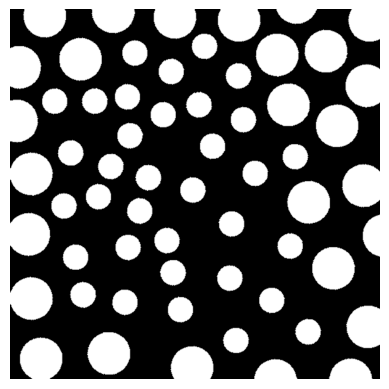

In [5]:

plt.imshow(img_circle,cmap="gray")
plt.axis('off')

###  Task 1: is to extract small circles and large circles by performing certain Morphological operations.** 

**Therefore, you have to apply different Morphological Operations such opening and/or closing.** 

*For these Morphological Operations, consider the following:*

- **defining structuring elements (SE)** (to be defined using one of the imported functions such as `diamond,disk,square`).
    * Example SE = disk(1) which will give cross-shape SE of size 3x3, since the size is (2k+1,2k+1), where k is the given size.
    * You can display it using plt.imshow(SE, cmap='gray')
- **defining the size of SE.** e.g `1,3,5, 7, 9,13,15,17,19,21,23, etc ....`. For that you have to search for the correct size experimentaly and report the best one. Consider the size as the radius in case of disk. Remember, based on the shape and the size, you can eleminate certain shapes/objects.

- If you extacted small/large circles which contain some boundaries of small/large circles that are unwanted, consider filtering them using certain morphological operation.

**Remark:** we imported the library `morphology` from `skimage` and we called it as `morph` therefore, to use dilation for example, use `morph.dilation` or for erosion `morph.erosion` and so on. Same for opening and closing.


-------------
**Steps to follow:**
-------------
1. **Eliminate Small Circles** and only keep the large ones. Save the results in `large_circles`.

2. **Eliminate the Large Circles** and keep only the small ones. Here it could be just a simple difference between the original image and `large_circles`. Save the results in `small_circles`.

3. **Filter out unwanted large circle boundaires** in `small_circles` using one of the operations such as `opening or closing`

(-0.5, 599.5, 599.5, -0.5)

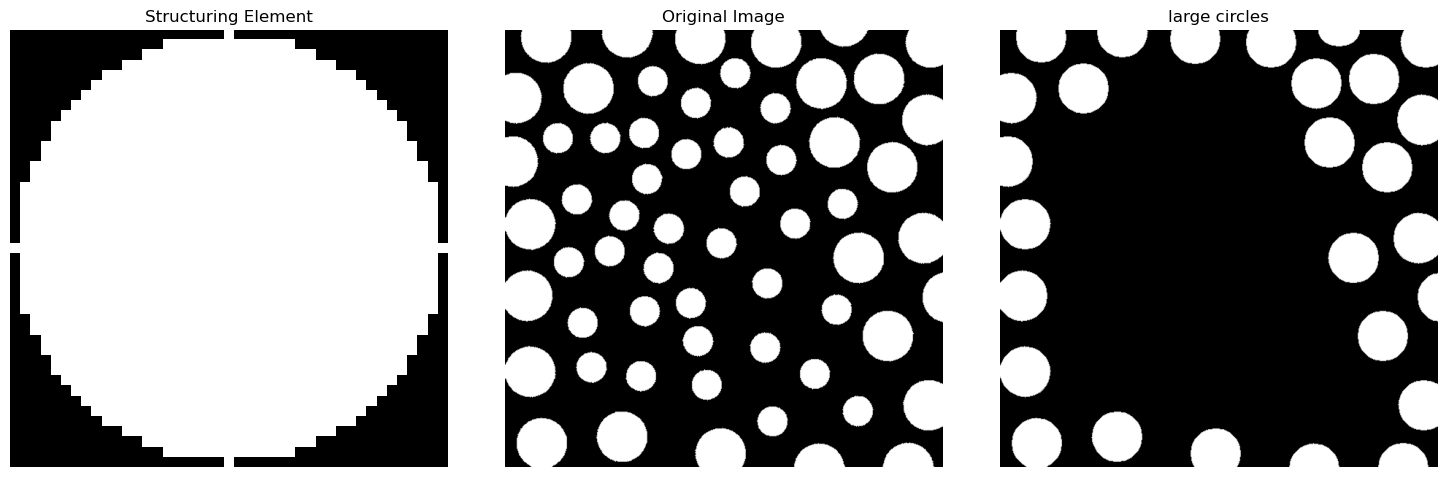

In [6]:
SE = disk(21)
large_circles= opening(img_circle, SE)


fig, ax = plt.subplots(1, 3, figsize=(15,5))
fig.tight_layout()
ax[0].imshow(SE, cmap='gray')
ax[0].set_title('Structuring Element')
ax[0].axis('off')


ax[1].imshow(img_circle, cmap='gray')
ax[1].set_title('Original Image')
ax[1].axis('off')

ax[2].imshow(large_circles, cmap='gray')
ax[2].set_title('large circles')
ax[2].axis('off')
#fig.savefig("small_circ_removal.png", bbox_inches='tight', dpi=250)

(-0.5, 599.5, 599.5, -0.5)

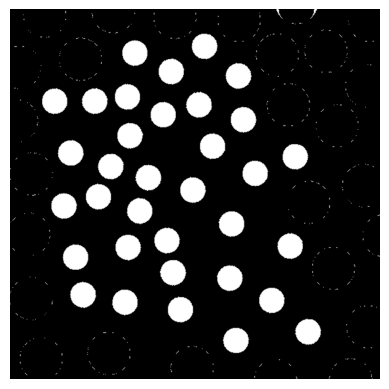

In [7]:
small_circles = img_circle - large_circles

# Check if extra filtering is required
fig = plt.figure()
plt.imshow(small_circles,cmap="gray")
plt.axis('off')
#fig.savefig("small_circles_not_filtered.png", bbox_inches='tight', dpi=250)


(-0.5, 599.5, 599.5, -0.5)

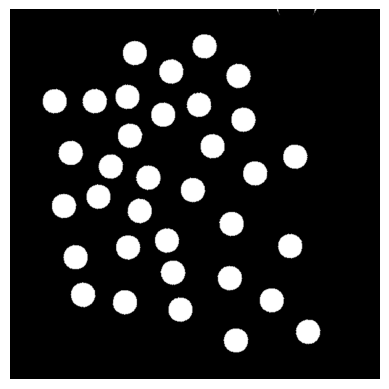

In [8]:
# Filtering the unwanted large circle boundaires
SE = disk(1)
small_circles_filtered=erosion(small_circles, SE)

fig = plt.figure()
plt.imshow(small_circles_filtered,cmap="gray")
plt.axis('off')
#fig.savefig("small_circles_filtered.png", bbox_inches='tight', dpi=250)


### Task 2: Extract the boundaries between the small and the large circles.** 

- For that, think about using the image of the large circle you extacted. 
- Then, make those circles connected as one object using certain morphological operation with a SE of certain shape and size. 
- Once connected correctly, you can compute the morphological gradient on that image (which is the dilation(input) - erosion(input).
- Once the boundary obtained, superimpose it over the original image.

(-0.5, 599.5, 599.5, -0.5)

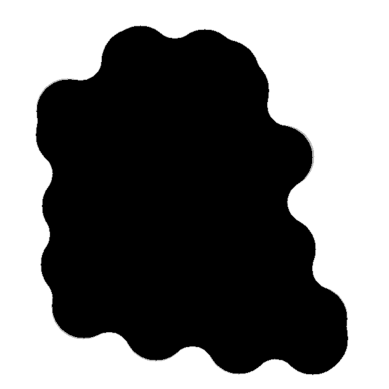

In [9]:
SE = disk(51)
connected_large_circles= closing(large_circles, SE)

plt.imshow(connected_large_circles,cmap="gray")
plt.axis('off')

(-0.5, 599.5, 599.5, -0.5)

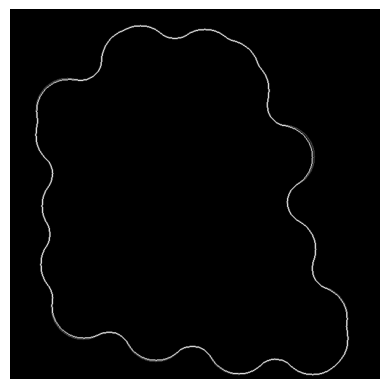

In [10]:
SE = disk(1)
connected_large_circles_gradient = dilation(connected_large_circles, SE) - erosion(connected_large_circles, SE)

plt.imshow(connected_large_circles_gradient,cmap="gray")
plt.axis('off')

(-0.5, 599.5, 599.5, -0.5)

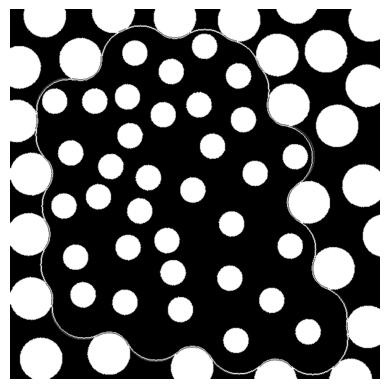

In [11]:
#Final Results
fig = plt.figure()
plt.imshow(img_circle+connected_large_circles_gradient,cmap="gray")
plt.axis('off')
#fig.savefig("boundaires.png", bbox_inches='tight', dpi=500)



Dans un premier temps, nous appliquons une opération de closing, qui permet de combler les espaces du background. Pour cela nous avons choisi un noyau disque de taille 51 afin que la frontière entre les grands cercles et les petits cercles soit bien dessinée, et ne dépende plus de la forme des grands cercles originels. Pour une taille inférieure, une deuxième frontière apparait entre les cercles les plus éloignés.

# Problem 2: Thresholding

#  Context

* You have a sequence of 20 consecutive images depicting a scene in which a car moves while rainfall. Your objective is to segment the image `in000234.jpg` so that the foreground elements—specifically the car (as well as roads, walls, floor, etc.) are separated from the background. Once you have a good segmentation algorithm, you can use it to segment the rest of the images in the folder, but this task is optional.

* Problem: because raindrops and rain streaks introduce unwanted noise, you must design your method to handle and suppress these artifacts. Once you have segmented all 20 frames, you should be able to view them in sequence and clearly observe the car’s movement over time. This for example could permit to compute the car speed!

* To solve the problem, follow the Tasks:

### Task 1: Image visualisation and thresholding

1. Read the image `in000234.jpg` from `car_rain` folder using the function `io.imread`. 
2. Use the function `color.rgb2gray` to transform yhe image into gray level. This function squash the range from [0,255] to values between [0,1].
3. We will display the histogram of the image, consider analyzing it (how many peaks? Which one could belong to foreground/background).
4. Use the function `otsu_threshold()` to threshold the gray scale image.
5. We will provide the histogram with the calculated threshold and the displayed mask


In [12]:
# Load and convert to grayscale
image = io.imread("car_rain/in000234.jpg")
gray = color.rgb2gray(image)

(-0.5, 719.5, 539.5, -0.5)

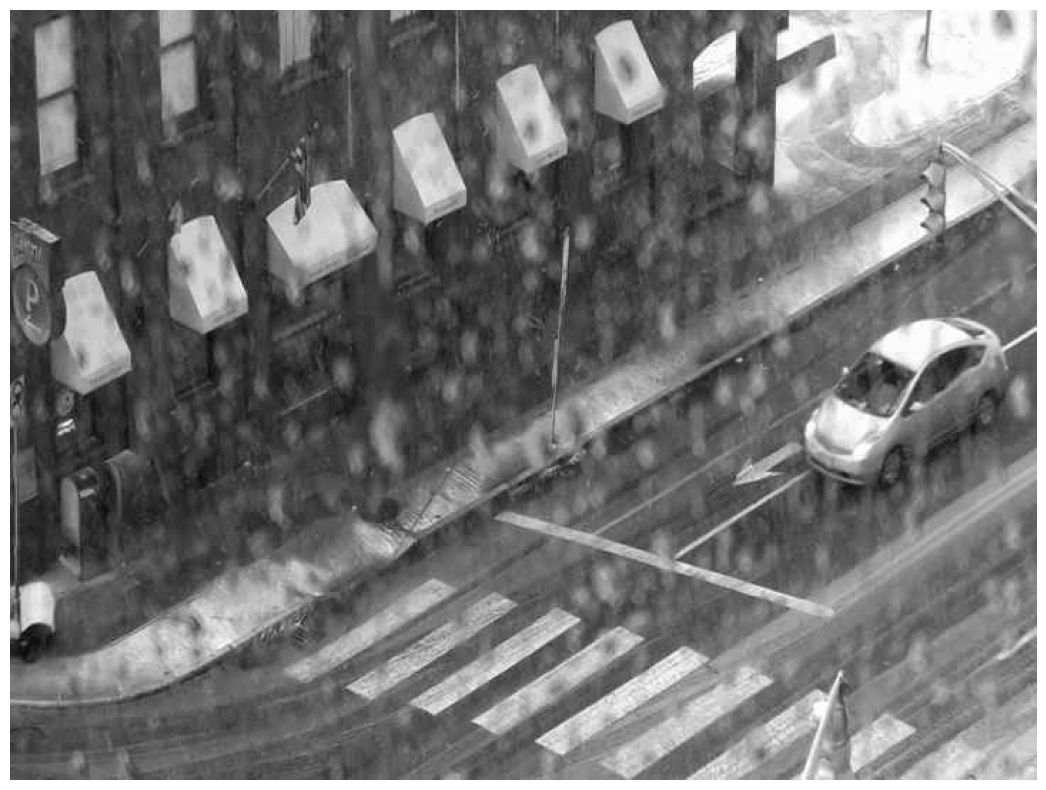

In [13]:
fig = plt.figure(figsize=(15,10))
plt.imshow(gray,cmap="gray")
plt.axis('off')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


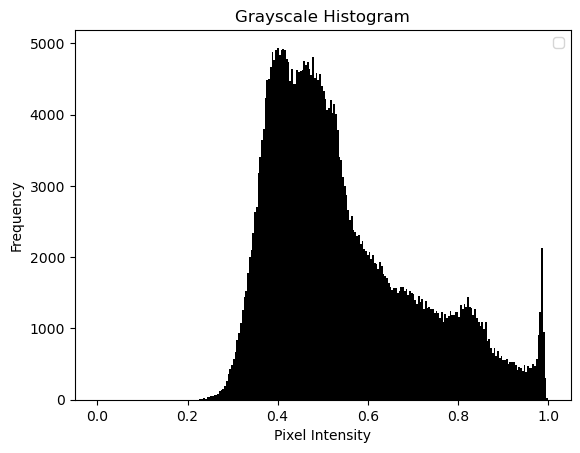

In [14]:
plt.hist(gray.flatten(), bins=256, range=(0,1), color='black'); 
plt.title("Grayscale Histogram"); 
plt.xlabel("Pixel Intensity"); 
plt.ylabel("Frequency"); 
plt.legend(); 
plt.show()


In [15]:
def otsu_threshold(image):
    # Convert image to a flattened array
    image = image.astype(np.float32)
    hist, bins = np.histogram(image.flatten(), bins=256, range=(0,1))#in case the dynamic range is between 0 and 1
    total_pixels = image.size
    current_max_variance = 0
    optimal_threshold = 0
    
    sum_total = np.sum(bins[:-1] * hist)  # Weighted sum of intensities
    sum_background = 0
    weight_background = 0
    weight_foreground = 0
    
    for i in range(256):
        weight_background += hist[i]
        weight_foreground = total_pixels - weight_background
    
        sum_background += bins[i] * hist[i]
        mean_background = sum_background / weight_background
        mean_foreground = (sum_total - sum_background) / weight_foreground
        
        between_class_variance = weight_background * weight_foreground * (mean_background - mean_foreground) ** 2
        
        if between_class_variance > current_max_variance:
            current_max_variance = between_class_variance
            optimal_threshold = bins[i]
    
    # Apply thresholding
    otsu_thresh = (image > optimal_threshold).astype(np.uint8) * 255
    
    return otsu_thresh, optimal_threshold


In [16]:
binary_mask,th = otsu_threshold(gray)

C:\Users\quent\AppData\Local\Temp\ipykernel_17988\1358109058.py:19: RuntimeWarning: invalid value encountered in double_scalars
  mean_background = sum_background / weight_background
C:\Users\quent\AppData\Local\Temp\ipykernel_17988\1358109058.py:20: RuntimeWarning: invalid value encountered in double_scalars
  mean_foreground = (sum_total - sum_background) / weight_foreground


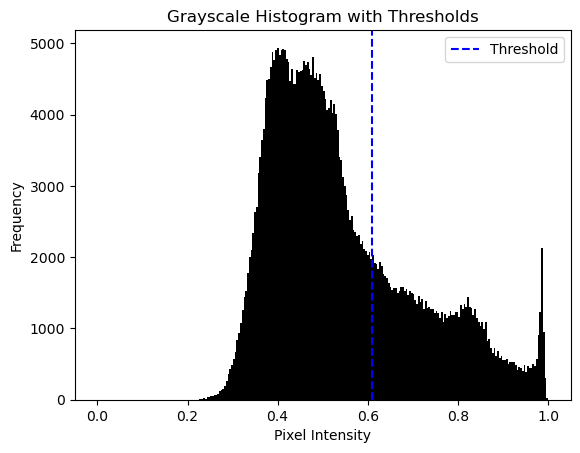

In [17]:
# Re plot the histogram except that here we will add the threshold on the same figure
plt.hist(gray.ravel(), bins=256, range=(0,1), color='black'); 
plt.title("Grayscale Histogram"); 
plt.xlabel("Pixel Intensity"); plt.ylabel("Frequency"); 

plt.axvline(x=th, color='b', linestyle='--', label="Threshold"); 
plt.title("Grayscale Histogram with Thresholds"); plt.xlabel("Pixel Intensity"); 
plt.ylabel("Frequency");
plt.legend(); 
plt.show()


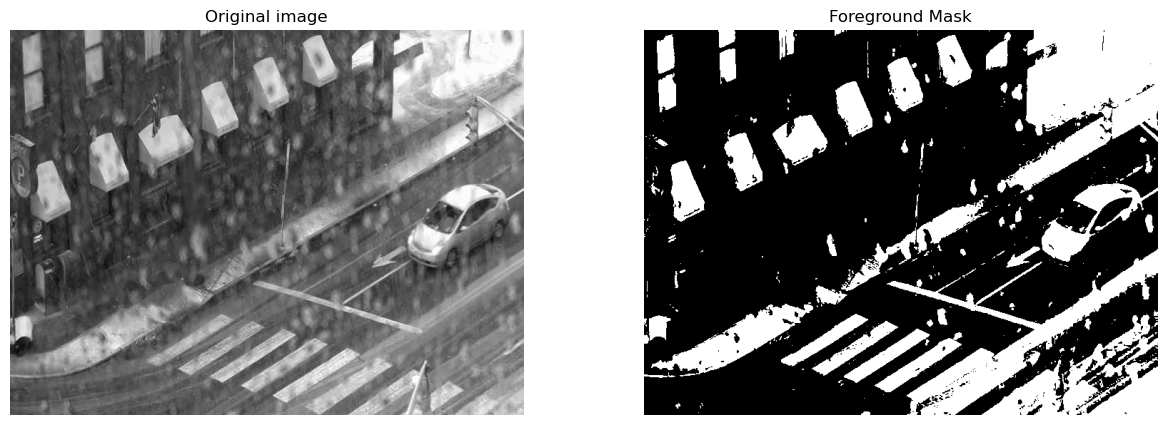

In [18]:
# Visualize the original image and its binary mask
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(gray, cmap='gray'); 
axes[0].set_title("Original image"); 
axes[0].axis("off")

axes[1].imshow(binary_mask, cmap='gray'); 
axes[1].set_title("Foreground Mask"); 
axes[1].axis("off")
plt.show()


**6. Analyze the Results:** 
   - Evaluate the quality of the extracted foreground mask.
   - Consider whether all noise has been effectively removed. 
   - Are there any bright spots or reflective areas in the original image that were mistakenly classified as foreground due to thresholding? 
   - How we could solve these problems?

On observe que le masque n'est pas de bonne qualitée: la zone dans le coin supérieur droit est détectée comme un premier plan, ainsi que les particules de pluies. La méthode d'Otsu permet d'identifier automatiquement le seuil global de l'image le mieux adapté. Cependant, il semble qu'il y ai une réflexion lumineuse importante en haut à droite de l'image, et cela parasite le résultat. L'arrière plan est partiellement restitué et séparé du premier plan car il y a plusieurs parties où la luminosité relative de la zone est supérieure à la luminosité général de l'image, ainsi le threshold trouvé ne correspond pas à chaques zones, et des zones d'arrières plan sont considéré en tant que premier plan. De plus, les aspérités de pluie modifie l'intensité lumineuse de certain point, ce qui biaise la détection et affiche les goutes de pluies au premier plan. Comme nous pouvons le remarquer avec l'histogramme, une trop grandes quantités d'intensités lumineuses de l'images sont supérieure au pic en 0.5, alors qu'aucune ne sont inférieures à 0.2, ce qui biaise le seuil trouvés par la méthode d'otsu (distribution inégale de l'intensité). Une méthode viable serait de prétraiter l'image afin d'homogénéiser l'intensité lumineuse de l'image, puis d'appliquer des opérations morphologiques afin de supprimer les goutes de pluies.

### Task 2: Background Reduction Using Black-Hat Transformation

In this task, we will focus on **reducing background variations** using **gray-level morphology** to enhance foreground objects. The approach we will follow is known as **Black-Hat Transformation**, a morphological technique that enhances **dark structures on a bright background**.

**Step 1: Background Approximation**
To suppress background noise, first apply **morphological opening** using a **large structuring element** such as `disk(25)`. This operation helps **smooth out the background** by eliminating small objects and textures, leaving only the dominant background structure.

**Step 2: Foreground Extraction**
Once the background has been approximated, extract the foreground by **subtracting the background from the original grayscale image**. This process enhances darker structures, ensuring that objects that differ from the dominant background are clearly highlighted.

**Step 3: Visualization & Analysis**

We will visualize:
1. The **Original Image** to observe its background variations.
2. The **Enhanced Image (Black-Hat Transformation Result)** to see how well the background has been suppressed.
3. The **Histograms of both images** to analyze pixel intensity distribution before and after the transformation.
4. Perform Otsu on the enhanced image.

**Observations & Analysis**
- After analyzing the **histograms before and after the Black-Hat Transformation**, how does the change in intensity distribution affect the segmentation process?
- How effectively does the **Black-Hat Transformation** suppress background noise?
- Are **foreground objects** more distinguishable in the enhanced image?
- How does the **histogram of the Black-Hat image** compare to the original?

In [19]:
selem_bg = disk(25)
background = opening(gray, selem_bg)
enhanced_image = gray - background

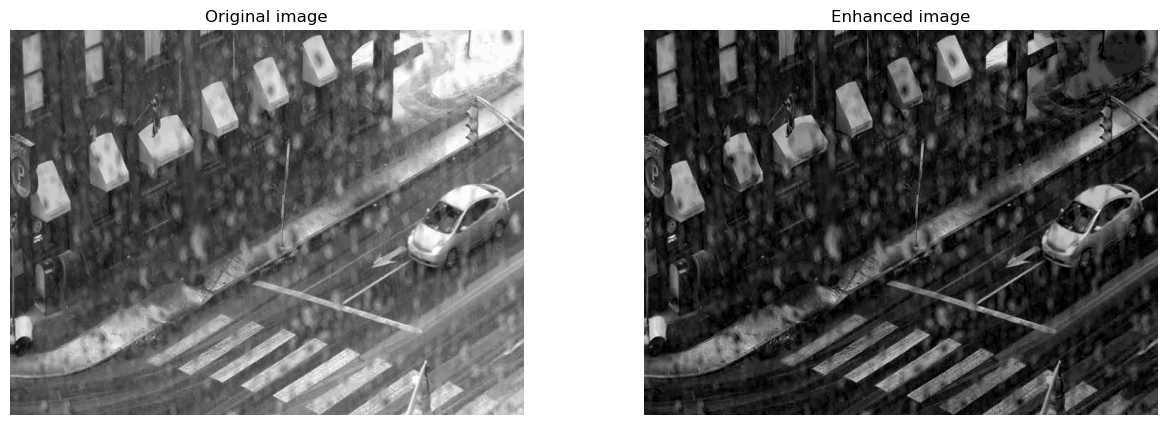

In [20]:
# Visualize the original image and the enhanced one
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(gray, cmap='gray'); 
axes[0].set_title("Original image"); 
axes[0].axis("off")

axes[1].imshow(enhanced_image, cmap='gray'); 
axes[1].set_title("Enhanced image"); 
axes[1].axis("off")
plt.show()


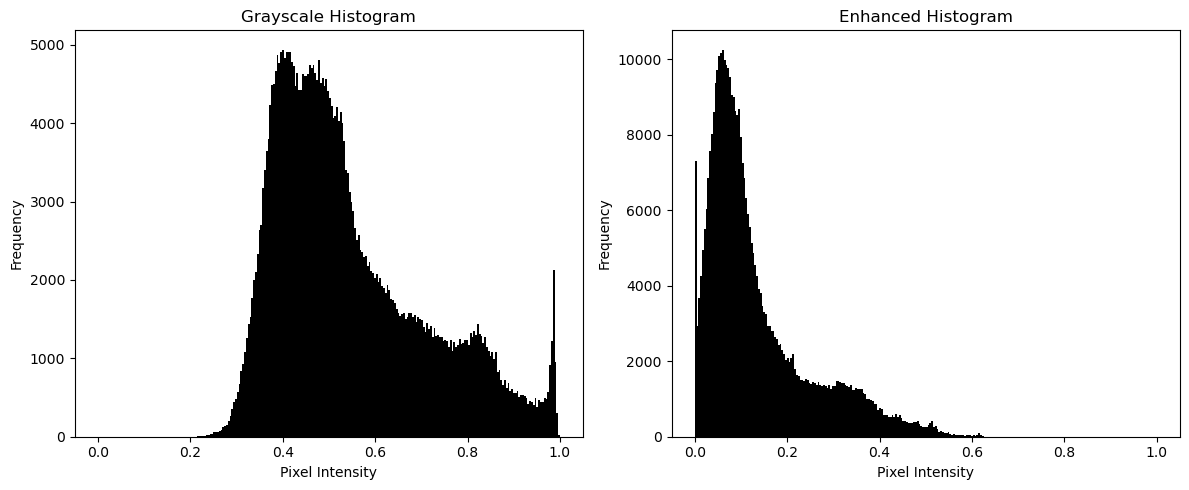

In [21]:
# Create subplots that plot the original histogram and the new enhanced one.
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot grayscale histogram
axes[0].hist(gray.flatten(), bins=256, range=(0,1), color='black')
axes[0].set_title("Grayscale Histogram")
axes[0].set_xlabel("Pixel Intensity")
axes[0].set_ylabel("Frequency")

# Plot enhanced image histogram
axes[1].hist(enhanced_image.flatten(), bins=256, range=(0,1), color='black')
axes[1].set_title("Enhanced Histogram")
axes[1].set_xlabel("Pixel Intensity")
axes[1].set_ylabel("Frequency")

# Show plots
plt.tight_layout()
plt.show()

In [22]:
# Apply Otsu Threshold over the new enhanced image
binary_mask_enhanced,th_enhanced = otsu_threshold(enhanced_image)

C:\Users\quent\AppData\Local\Temp\ipykernel_17988\1358109058.py:20: RuntimeWarning: invalid value encountered in double_scalars
  mean_foreground = (sum_total - sum_background) / weight_foreground


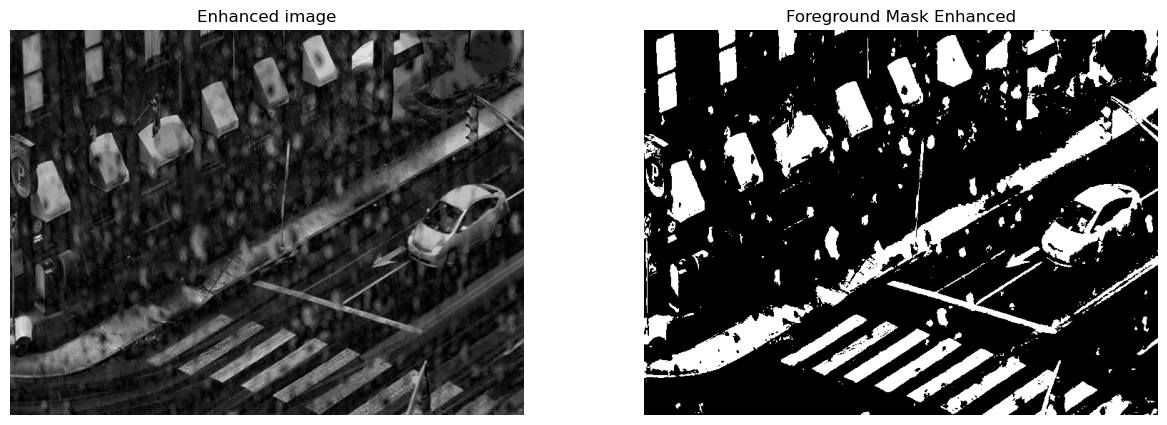

In [23]:
# Visualize the enhanced_image and binary_mask_enhanced
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(enhanced_image, cmap='gray'); 
axes[0].set_title("Enhanced image"); 
axes[0].axis("off")

axes[1].imshow(binary_mask_enhanced, cmap='gray'); 
axes[1].set_title("Foreground Mask Enhanced"); 
axes[1].axis("off")
plt.show()


**Observations & Analysis**
- After analyzing the **histograms before and after the Black-Hat Transformation**, how does the change in intensity distribution affect the segmentation process?
- How effectively does the **Black-Hat Transformation** suppress background noise?
- Are **foreground objects** more distinguishable in the enhanced image?
- How does the **histogram of the Black-Hat image** compare to the original?

On remarque que l'histogramme après la méthode de Black-Hat Transformation a bien ses niveaux d'intensité lumineuses diminués, puisque la plage d'intensité lumineuse sur l'histogramme est mieux répartie. La segmentation est améliorée, car la distribution lumineuse en haut à droite de l'image est égalée avec le niveau globale d'intensité de l'image. Cependant, les gouttes de pluies sont toujours présentes, et il faut donc appliquer un nouveau filtre afin de les supprimer. Les élements du premier plan sont bien mieux distinguables: le passage piéton est dessiné en entier cette fois ci, et on voit même le conducteur de la voiture contrairement à la méthode sans pré-traitement.

### Task 3: Post-Processing operation using Morphological Cleanup

To clean out the remaining noise due to raindrops, we will rely on `remove_small_objects()` and `remove_small_holes()` functions. The first identifies connected regions in a binary image, 
then removes small regions with fewer than a specified pixel threshold, while the second identifies small foreground holes in binary images and replaces them with foreground pixels, adhering to a specific size threshold.


**Remark:** It is important to transfer binary_mask from 0 and 1 or 0 and 255 to boolean (True, False) so that the functions remove_small_objects and remove_small_holes has effect.


* **Next, consider using these two operations and figure out the right `min_size` and `area_threshold` parameters.**
* **Comment on the final results.**

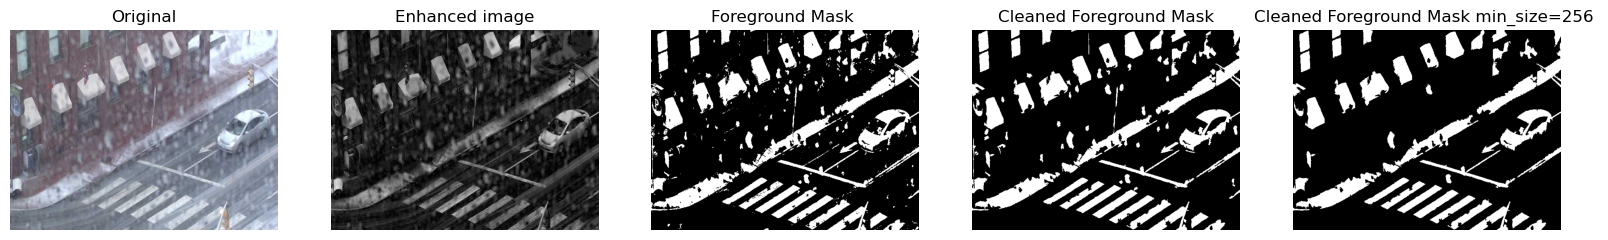

In [24]:
binary_mask_enhanced_post_processed = binary_mask_enhanced.astype(bool)

#removing noise.
binary_mask_enhanced_post_processed = remove_small_objects(binary_mask_enhanced_post_processed)

#replace holes with foreground pixels
binary_mask_enhanced_post_processed = remove_small_holes(binary_mask_enhanced_post_processed)

#optimizing the given function (made by students)
binary_mask_enhanced_post_processed2 = remove_small_objects(binary_mask_enhanced_post_processed, min_size=256)

# Visualize
fig, axes = plt.subplots(1, 5, figsize=(20,15))
axes[0].imshow(image, cmap='gray'); axes[0].set_title("Original"); axes[0].axis("off")
axes[1].imshow(enhanced_image, cmap='gray'); axes[1].set_title("Enhanced image"); axes[1].axis("off")
axes[2].imshow(binary_mask_enhanced, cmap='gray'); axes[2].set_title("Foreground Mask "); axes[2].axis("off")
axes[3].imshow(binary_mask_enhanced_post_processed, cmap='gray'); axes[3].set_title("Cleaned Foreground Mask"); axes[3].axis("off")
axes[4].imshow(binary_mask_enhanced_post_processed2, cmap='gray'); axes[4].set_title("Cleaned Foreground Mask min_size=256 "); axes[4].axis("off")

plt.show()

* Analyze the final results by comparing binary_mask_enhanced and binary_mask_enhanced_post_processed. What specific information has been filtered out in the post-processed version? What elements have been retained? Is the outcome satisfactory? Additionally, assess the preservation of geometrical features such as edges, round shapes, and other structural details. Has the geometrical information been fully preserved?

Nous observons que lorsque nous utilisons cette méthode de nettoyage morphologique sans changer min_size, beaucoup des petites taches sont étés effacés, mais il semble que certaines grosses gouttes n'ont pas étés effacés. En effet, la valeur de min_size est par défaut à 64 (qui correspond d'après la documentation de la plus petite taille de l'objet acceptable), ce qui enlève les petites aspérités, mais laisse les grosses goutes. Le résultat reste convenable: conservation de la pluspart des éléments du premier plan, tel que la forme des objets avec une taille importante, mais nous pouvons déjà discerner l'absence de la première ligne à droite de la voiture. En changeant la min_size manuellement à 256, on observe une nette amélioration, et la plupart des gouttes semblent avoir disparues. Cependant, il est important de noter qu'au plus on incrémente min_size, au plus on va impacter le rendue: au delà de 256, on commence à enlever des parties d'images qui nous interessent, en particuler les careaux de fenetres qui commencent à disparaitre et qui nous serviront pour mesurer la vitesse de la voiture. Mis à part cela, toutes les types de formes ont été supprimés, que ça soit des coins, des formes rondes ou des traits, du moment qu'ils ont une taille inférieur à la limite définie. Les informations géométriques ont donc été préservées.

###  Task 4: Comparison to other thresholding techniques

**. Given the following functions `iterative_global_threshold` and `adaptive_threshold`:**

1. Apply `iterative_global_threshold` over the enhanced image. Here consider a value of small `tol` such as 0.0001. You can experiment with `tol=1` and check its impact on the threshold you obtain. In order to see the differences between methods, here we will not do any post processing. We will rely on the results directly as we know that we could clean the remaining noise easily.

2. Apply `adaptive_threshold` over the enhanced image and apply the same post processing operation you have done previously. Here, consider the following parameters in different experiments:
    
    - k=0.5,alpha=0.5 with block size 9
    - k=0.5,alpha=0.5 with block size 105
    - k=0.5,alpha=0.3 with block size 105   
    - k=0.2,alpha = 0.8 with block size 105   
    - **Comment on the impact of k and alpha, what do they exactly try to control?** 
    
    
3. Given: we will plot using subplot the final obtained results from Otsu, Iterative global thresholding, adaptive thresholding.

4. **Comment on the results, which method(s) showed the best results and why?** Your analysis should be based on the local and global variance you see in the image, spot of bright intensities and dark intensities, why certain method could reduce from the effect of certain undesired artifcat such as raindrops while other method responded strongly?.
  

In [25]:
def iterative_global_threshold(image, tol=0.001):
    prev_threshold = np.mean(image)
    while True:
        c1 = image[image <= prev_threshold]
        c2 = image[image > prev_threshold]
        mean_c1 = np.mean(c1) if c1.size > 0 else 0
        mean_c2 = np.mean(c2) if c2.size > 0 else 1
        new_threshold = (mean_c1 + mean_c2) / 2
        if abs(new_threshold - prev_threshold) < tol:
            break
        prev_threshold = new_threshold
    return new_threshold

In [26]:
def adaptive_threshold(image, block_size,k,alpha):
    """
    Adaptive thresholding using both mean and variance of the local region.

    Parameters:
    - image: Input image (NumPy array)
    - block_size: Size of the local region (must be odd)

    Returns:
    - Thresholded binary image
    """

    h, w = image.shape
    padded_image = cv2.copyMakeBorder(image, block_size // 2, block_size // 2,
                                      block_size // 2, block_size // 2, cv2.BORDER_REPLICATE)

    result = np.zeros_like(image)
 
    for i in range(h):
        for j in range(w):
            local_region = padded_image[i:i + block_size, j:j + block_size]
            local_mean = np.mean(local_region)
            local_variance = np.var(local_region)
            threshold = local_mean + k * (local_variance ** alpha)            
            result[i, j] = 1 if image[i, j] > threshold else 0
            

    return result


#### Global Iterative Thresholding Experiment

In [27]:
th_iterative_global = iterative_global_threshold(enhanced_image, 0.0001)

In [28]:
iterative_global_result = (enhanced_image > th_iterative_global).astype(np.uint8) * 255

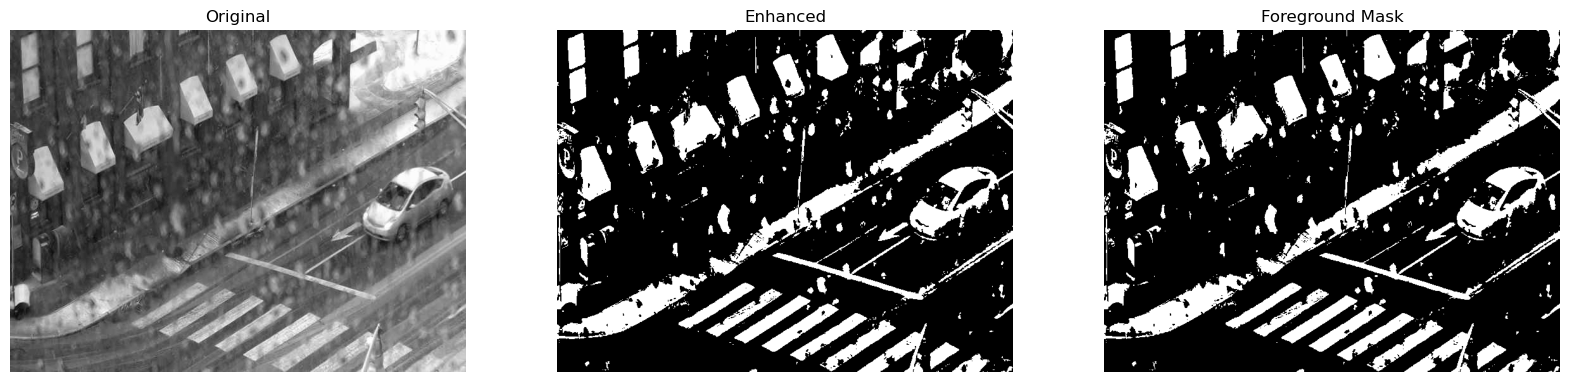

In [29]:
# Visualize the binary_mask_enhanced from otsu previously and iterative_global_result
fig, axes = plt.subplots(1, 3, figsize=(20,15))
axes[0].imshow(gray, cmap='gray'); axes[0].set_title("Original"); axes[0].axis("off")
axes[1].imshow(binary_mask_enhanced, cmap='gray'); axes[1].set_title("Enhanced"); axes[1].axis("off")
axes[2].imshow(iterative_global_result, cmap='gray'); axes[2].set_title("Foreground Mask"); axes[2].axis("off")
plt.show()

On observe que la méthode de seuillage itérrative avec tol = 0,0001 permet une très légère suppression des artéfact mais non significative. Cependant, lorsqu'on utilise le tol à 1, on observe une augmentation du bruit.  Lorsque tol est grand, l'algorithme s'arrête dès que la différence entre les seuils successifs devient inférieure à tol, même si le seuil n'est pas réellement convergé vers une valeur optimale. Cela conduit donc à sélectionner un seuil inexact qui ne sépare pas correctement les pixels d'intérêt du fond. Le résultat est une segmentation imparfaite où certaines zones sont mal classées.

#### Adaptive Thresholding Experiment

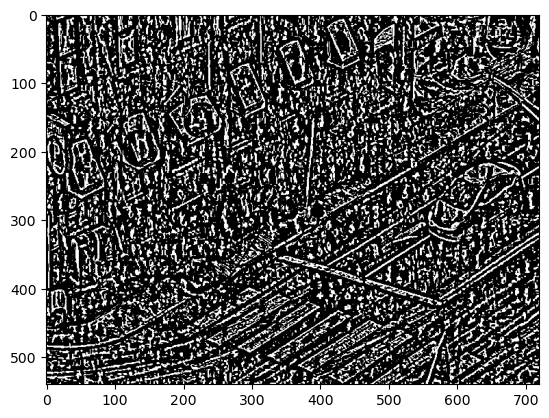

In [30]:
binary_mask_adaptive_threshold_9 =  adaptive_threshold(enhanced_image,9,0.5,0.5)
 
plt.imshow(binary_mask_adaptive_threshold_9,cmap='gray')

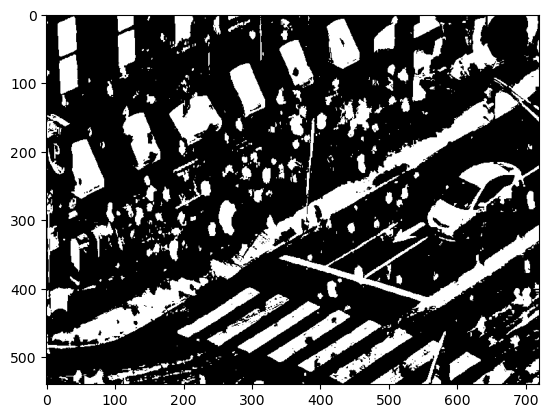

In [31]:
binary_mask_adaptive_threshold_105 =  adaptive_threshold(enhanced_image, 105, 0.5, 0.5)
 
plt.imshow(binary_mask_adaptive_threshold_105,cmap='gray')

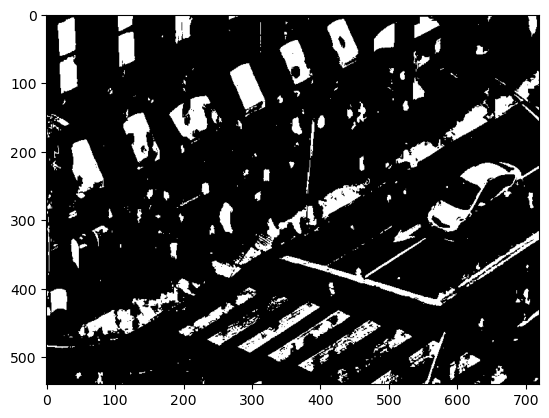

In [32]:
binary_mask_adaptive_threshold_105_k5_alpha3 =  adaptive_threshold(enhanced_image,105, 0.5,0.3)
 
plt.imshow(binary_mask_adaptive_threshold_105_k5_alpha3,cmap='gray')

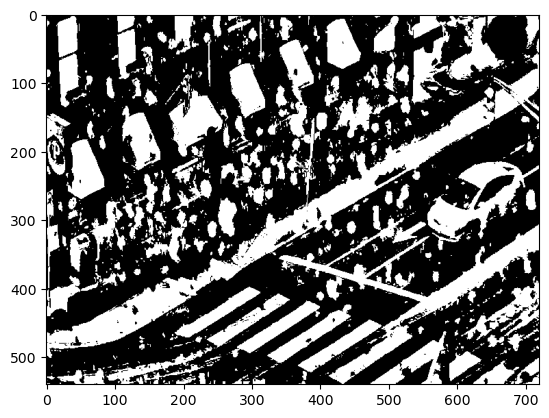

In [33]:
binary_mask_adaptive_threshold_105_k2_alpha8 =  adaptive_threshold(enhanced_image, 105,0.2,0.8)
plt.imshow(binary_mask_adaptive_threshold_105_k2_alpha8,cmap='gray')

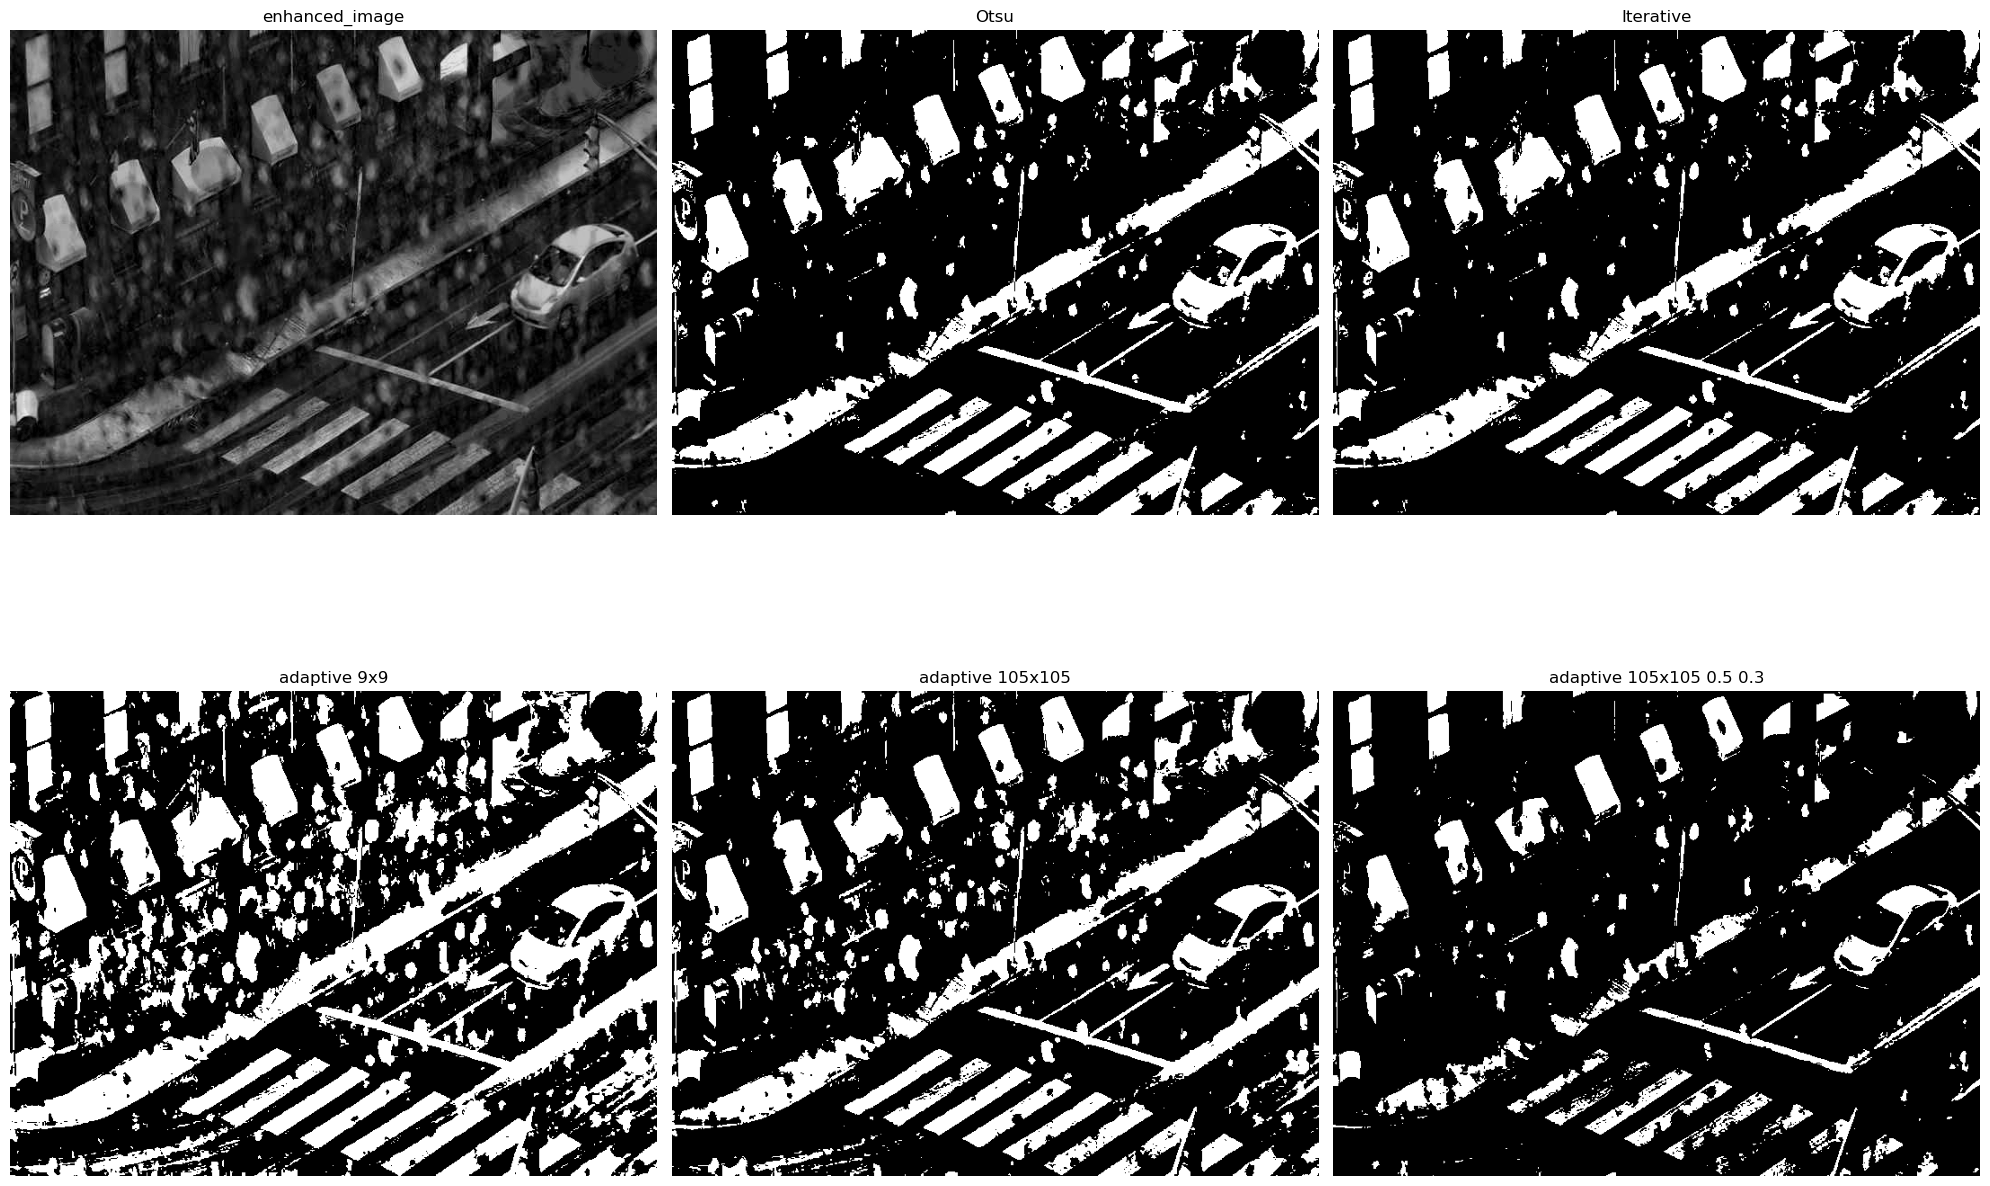

In [34]:
# Visualize:
fig, axes = plt.subplots(2, 3, figsize=(20,15))
axes[0,0].imshow(enhanced_image, cmap='gray'); axes[0,0].set_title("enhanced_image"); axes[0,0].axis("off")
axes[0,1].imshow(binary_mask_enhanced, cmap='gray'); axes[0,1].set_title("Otsu"); axes[0,1].axis("off")
axes[0,2].imshow(iterative_global_result, cmap='gray'); axes[0,2].set_title("Iterative"); axes[0,2].axis("off")

axes[1,0].imshow(binary_mask_adaptive_threshold_105_k2_alpha8, cmap='gray'); axes[1,0].set_title("adaptive 9x9"); axes[1,0].axis("off")
axes[1,1].imshow(binary_mask_adaptive_threshold_105, cmap='gray'); axes[1,1].set_title("adaptive 105x105"); axes[1,1].axis("off")
axes[1,2].imshow(binary_mask_adaptive_threshold_105_k5_alpha3, cmap='gray'); axes[1,2].set_title("adaptive 105x105 0.5 0.3"); axes[1,2].axis("off")

plt.tight_layout()
plt.show()

plt.show()

4. **Comment on the results, which method(s) showed the best results and why?** 
   - Your analysis should be based on the local and global variance you see in the image, spot of bright intensities and dark intensities, why certain method could reduce from the effect of certain undesired artifcat such as raindrops while other method responded strongly?.
  

Dûe à la taille non-constante des gouttes d'eau, nous avons la méthode d'adaptative_threshold qui n'est malheureusement pas adaptée à notre problème: en effet, dûe au fait que la taille des bloc size (qui représente la taille de la région d'étude de la variance locale) est constante sur toute l'image, nous ne pouvons trouver une taille générique qui assure le bon traitement des gouttes, car leur taille varie énormément. Ainsi la moyenne locale pourra plus ou moins être influencé par des goutes d'eau. Les facteurs k et alpha, servant à pondérer la variance locale des pixels, sont extremement sensible et n'assure pas une bonne restitution de l'image pour les quelques exemples essayés. Il faudrait en tester des milliers, rien que pour cette image. La méthode avec le plus de robustesse reste donc la méthode itérative ou d'otsu après pré-traitement de l'image 

# Problem 3: Defect Detection

**Context:**
In the following we will rely on the concept of region growing in order to perform segmentation related to problem such as defect or anomaly detection. The idea is that we will first search for seed points that we grow our region from it. For that we will search for either local minima and maxima (extrema) similar to what we have seen in feature detection or we will simply rely on some thresholding method followed by some morphological operation to select seeds, this ensures that the segmentation process starts from **relevant regions** and expands to capture meaningful structures. The second method is the one adapted in this BE. 



* **DATA** stored in the folder called `defects`. You are given 6 images called `crack1` to `crack6` with `.png` extension.

In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage.morphology import label, black_tophat, disk
from skimage.filters import threshold_otsu
from collections import deque
from skimage.exposure import equalize_adapthist

In [36]:
# GIVEN: No intervention from your side
def Region_Growing(image, seed_point, tolerance=2, connectivity=4):
    """
    Perform Flood Fill or region growing algorithm.
    Parameters:
    - image: Grayscale input image.
    - seed_point: Tuple (y, x) defining the starting pixel.
    - tolerance: Intensity difference tolerance for expansion.
    - connectivity: 4 or 8 (for 4-connectivity or 8-connectivity).
    Returns:
    - Binary mask of the filled region
    """
    
    h, w = image.shape
    filled = np.zeros_like(image, dtype=np.uint8)
    seed_y, seed_x = seed_point
    seed_value = image[seed_y, seed_x]


    if connectivity == 4:
        neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0)]
    else:
        neighbors = [(0, 1), (1, 0), (0, -1), (-1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    queue = deque([(seed_x, seed_y)])

    while queue:
        x, y = queue.popleft()
        if filled[y, x] == 255:
            continue
        if abs(int(image[y, x]) - int(seed_value)) <= tolerance + 0.1 * abs(int(image[y, x]) - np.mean(image)):
            filled[y, x] = 255
            for dx, dy in neighbors:
                nx, ny = x + dx, y + dy
                if 0 <= nx < w and 0 <= ny < h and filled[ny, nx] == 0:
                    queue.append((nx, ny))

    return filled

###  Task: Crack Detection using Region Growing Algorithm





**READ CAREFULLY**


In the following, your task is to use the GFR algorithm provided above to solve the problem of cracks detection.
To solve the problem, please follow the following steps:

1. Image Reading and Initial Analysis:
    - Load and visualize the image along with its histogram.
    - Comment on the quality of the image in terms of contrast, noise, and visibility of defects.

2. Image Enhancement:
    - If the image contrast is poor, apply either:
    - `equalize_adapthist()` to enhance contrast.
    - Or, Morphological image enhancement.
    - Plot the histograms of the enhanced image.
    - Compare the enhanced histogram with the original one.
    
3. Applying Otsu’s Thresholding:
    - Apply Otsu’s thresholding to extract the cracks/defects using the function `filters.threshold_otsu()` as it has a fast response.
    - Observe and comment on the results:
    - Does it successfully capture the defect?
    - Are there false positives or missed regions?

4. Adaptive Thresholding for Seed Selection: 
    - Your goal is to retrieve information about the defect, even if the results are not perfect. This binary mask will be useful in selecting seeds for region growing.
    - Implement adaptive thresholding using the following function:
    `cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=9, C=1)`
    - Tune the parameters: blockSize=?  and C=?
 
5. Morphological Operations for Refinement:
    - Apply a morphological operation to refine the binary mask obtained in Step 4. This operation should:
        - Select seeds from step 4 such that it preserve important crack regions/points.
        - Please transform the new mask to values (TRUE, FALSE) using `mask.astype(bool)`
        - The refined mask will be used as input for the Region_Growing() function. 


6. Region Growing for Crack Segmentation:
    - Use the selected seeds from Step 5 to apply the `Region_Growing()` function.
    - Obtain a final mask that highlights the detected cracks.
    - If needed, apply morphological post-processing to refine the results similar to Problem 2.


7. Superimposing the Crack on the Original Image:
    - Overlay the detected crack mask on the original image.
    - Comment on the final results:
        - Does the detected crack align well with the actual defect?
        - Are there any false positives or missed areas?

 

# Expected Results or at least very close to it for Image :

`crack1.png`,`crack2.png`,`crack3.png`,`crack4.png`,
`crack5.png`,`crack6.png`

![Crack Detection Result](./expectedResults/crack_detection_results_1.png)


![Crack Detection Result](./expectedResults/crack_detection_results_2.png)


![Crack Detection Result](./expectedResults/crack_detection_results_3.png)


![Crack Detection Result](./expectedResults/crack_detection_results_4.png)


![Crack Detection Result](./expectedResults/crack_detection_results_5.png)


![Crack Detection Result](./expectedResults/crack_detection_results_6.png)


---------------

# Start with the image `crack1.png` in `defects` folder.

**1.Image Reading and Initial Analysis**

In [37]:
image_path = "defects/crack1.png"
image = io.imread(image_path)


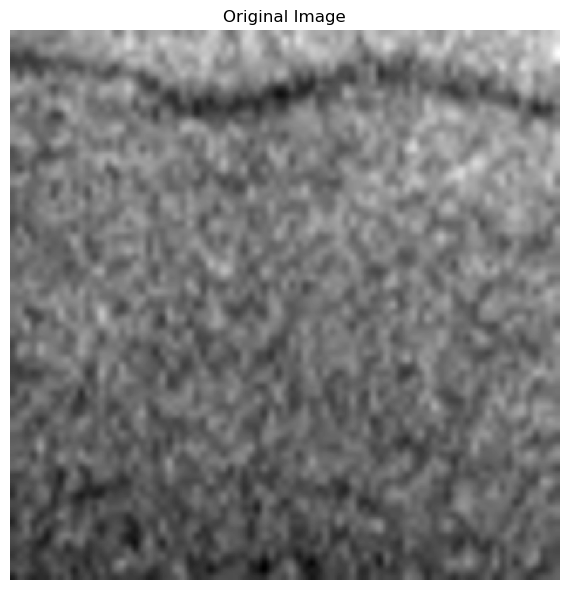

In [38]:
# Display the image
plt.figure(figsize=(18, 6))

plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")
 
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


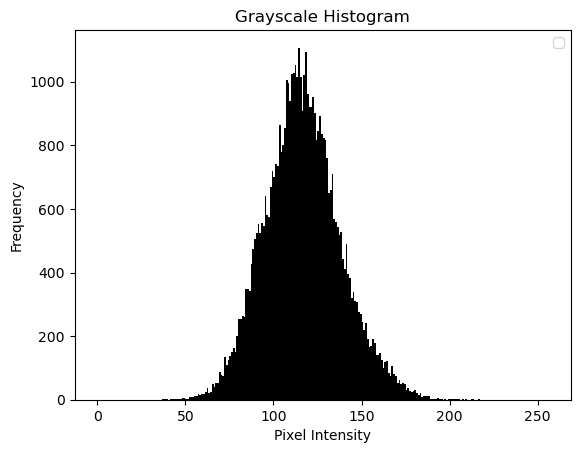

In [39]:
# Display the histogram
plt.hist(image.flatten(), bins=256 ,range=(0,256), color='black'); 
plt.title("Grayscale Histogram"); 
plt.xlabel("Pixel Intensity"); plt.ylabel("Frequency"); 
plt.legend(); 
plt.show()


**2. Image Enhancement**

In [40]:
# If you use equalize_adapthist() to enhance the contrast, this function transform the output into float.
# you can multiply the output by 255 and apply .astype(np.uint8) to make sure they are integer between 0 and 255.


# Apply equalize_adapthist
imageE = equalize_adapthist(image) 
imageE = (imageE*255).astype(np.uint8)



 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


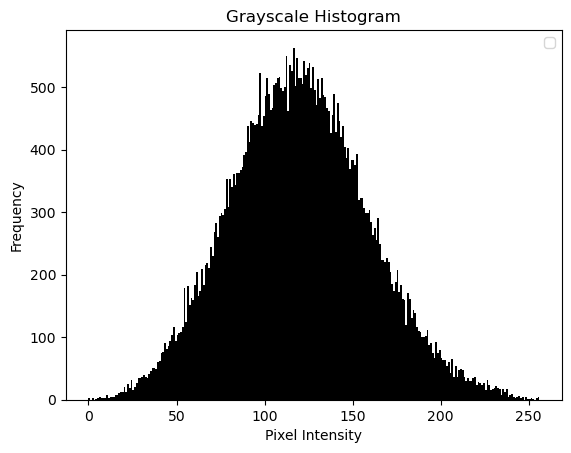

In [41]:
# Plot the histogram of the new enhanced image
plt.hist(imageE.flatten(), bins=256, range=(0,256), color='black'); 
plt.title("Grayscale Histogram"); 
plt.xlabel("Pixel Intensity"); plt.ylabel("Frequency"); 
plt.legend(); 
plt.show()

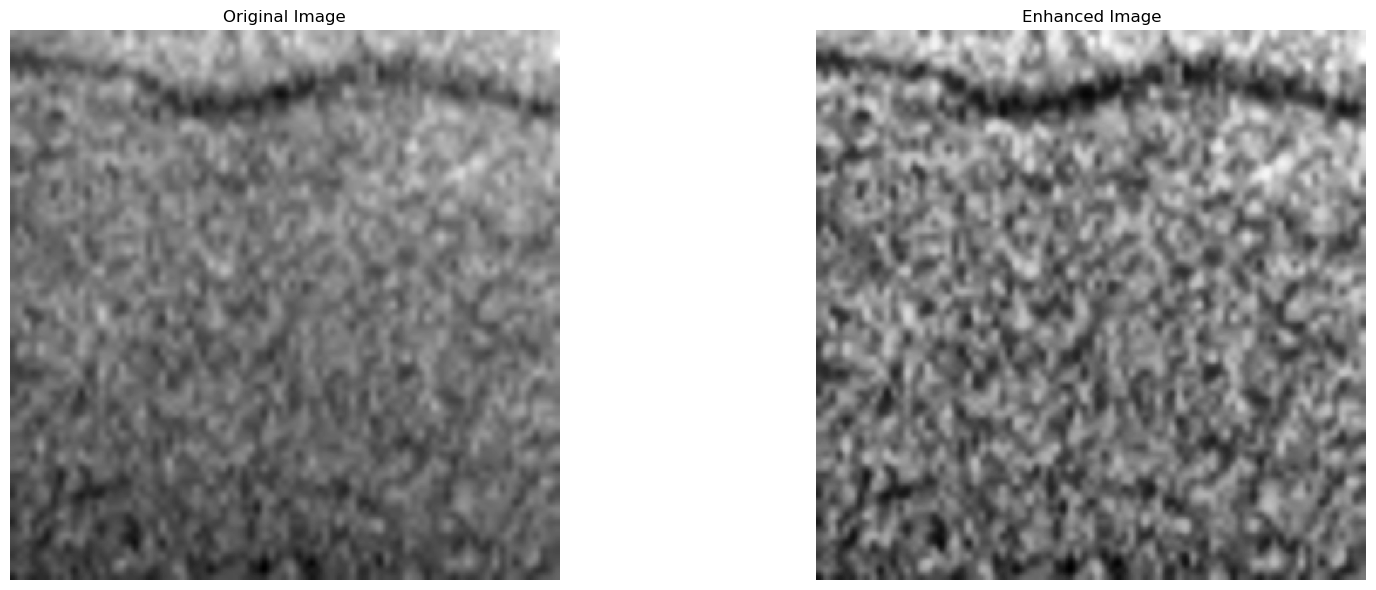

In [42]:

# Display results of the Enhanced Image and the original Image in a subplot
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(imageE, cmap='gray')
axes[1].set_title("Enhanced Image")
axes[1].axis("off")

 
plt.tight_layout()
plt.show()

**3. Applying Otsu’s Thresholding**

In [43]:
# Apply Otsu Threshold
th = filters.threshold_otsu(imageE)
binary_mask = imageE> th
    
# Switch the foreground color and the background color
binary_mask =  255-binary_mask

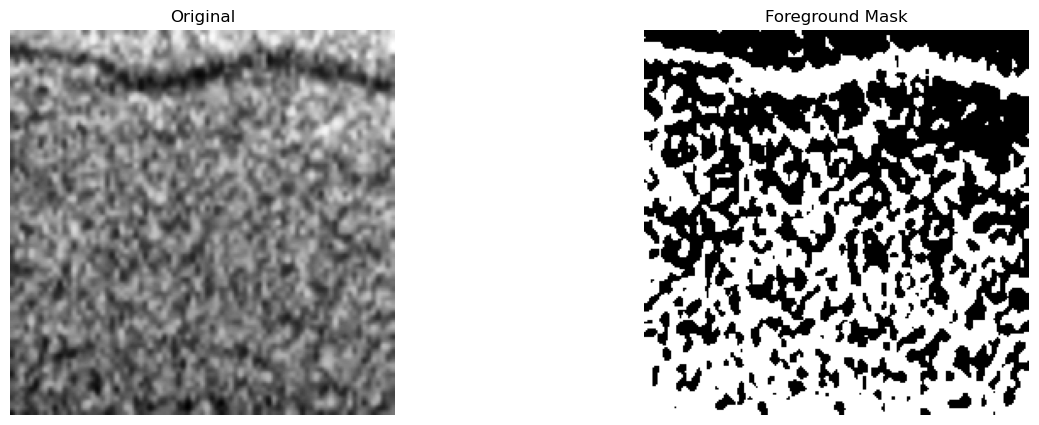

In [44]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(imageE, cmap='gray'); 
axes[0].set_title("Original"); 
axes[0].axis("off")

axes[1].imshow(binary_mask, cmap='gray'); 
axes[1].set_title("Foreground Mask"); 
axes[1].axis("off")
plt.show()


**4. Adaptive Thresholding for Seed Selection**

In [45]:
# Apply Adaptive Thresholding and tune correctly the parameters C and blockSize.
adaptive_mean = cv2.adaptiveThreshold(imageE, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=91, C=85)


# Hint: We will inverse the results by taking 255-output, so that Foreground are TRUE and Background are FALSE.
adaptive_mean = 255-adaptive_mean
# Transform into True and False (Boolean)
adaptive_mean = adaptive_mean.astype(bool)

Le paramètre C est une constante, que l'on retranche sur la valeur de la moyenne locale du block_size. Sachant que nous avons utiliser la fonction "equalize_adapthist", nous avons notre répartition d'intensité qui ressemble à une gaussienne centrée en 128. Ainsi, notre valeur de C ne doit donc pas être trop importante (C<120, sous peine d'écraser la répartition de notre intensité), mais suffisament grande pour distinguer l'arrière plan du premier plan.

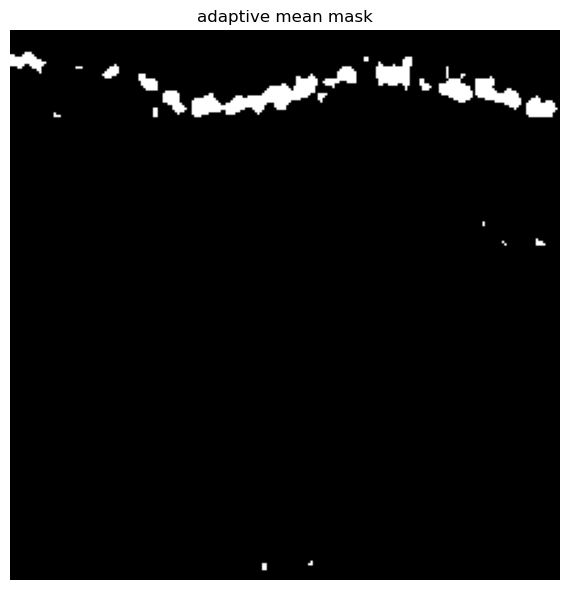

In [46]:
# Display the obtained mask
plt.figure(figsize=(18, 6))

plt.imshow(adaptive_mean, cmap='gray')
plt.title("adaptive mean mask")
plt.axis("off")
 
plt.tight_layout()
plt.show()

**5. Morphological Operations for Refinement**

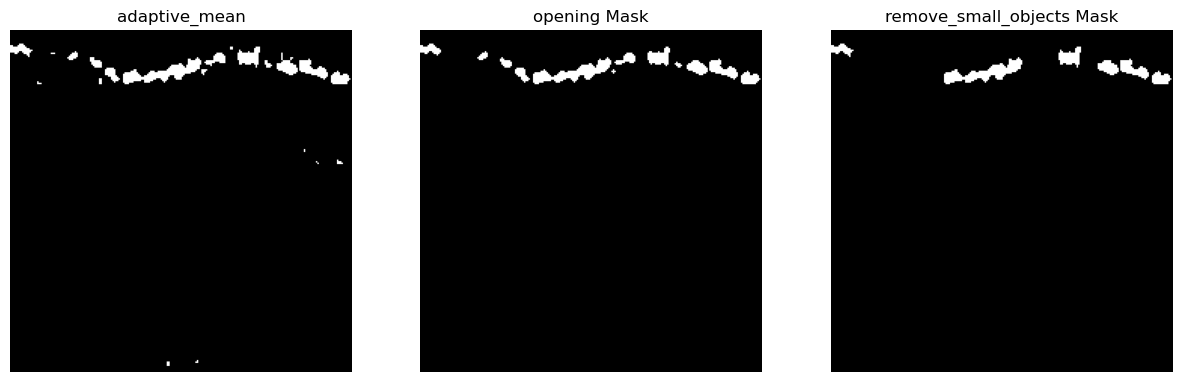

In [47]:

adaptive_mean_cleaned_o = opening(adaptive_mean)
adaptive_mean_cleaned_rso = remove_small_objects(adaptive_mean)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(adaptive_mean, cmap='gray'); 
axes[0].set_title("adaptive_mean"); 
axes[0].axis("off")

axes[1].imshow(adaptive_mean_cleaned_o, cmap='gray'); 
axes[1].set_title("opening Mask"); 
axes[1].axis("off")

axes[2].imshow(adaptive_mean_cleaned_rso, cmap='gray'); 
axes[2].set_title("remove_small_objects Mask"); 
axes[2].axis("off")
plt.show()

Due au traitement important de mon image avec adaptative_mean, si j'applique la fonction "remove_smalls_objects", je me retrouve avec une perte d'information trop importante, j'ai alors décidé de réaliser un "opening" afin de concerver un maximum d'information. L'opération morphologique suivante me sert alors à intensifier l'information en la dilatant.

In [48]:
# Use Morphology Operation to select some seed
SE = disk(1)
SeedMask = dilation(adaptive_mean_cleaned_o, SE)
SeedMask = (SeedMask*255).astype(np.uint8)

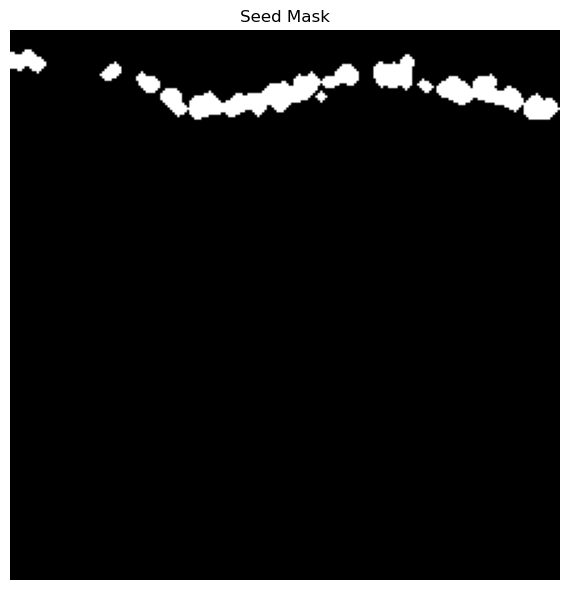

In [49]:
# Display the obtained Seed Mask
plt.figure(figsize=(18, 6))

plt.imshow(SeedMask, cmap='gray')
plt.title("Seed Mask")
plt.axis("off")
 
plt.tight_layout()
plt.show()

In [50]:
#GIVEN:

# The function `label()` identifies connected components in the Seed Mask 
# It return a labeled array where each connected component (region) in SeedMask is assigned a unique integer label.


labeled_seeds, num_seeds = label(SeedMask.astype(bool), connectivity=2, return_num=True)

In [51]:
print('Total Number of selected seeds/labels are: ', num_seeds)


Total Number of selected seeds/labels are:  8


**6. Region Growing for Crack Segmentation**

In [52]:
# Create an empty region mask
region_mask = np.zeros_like(imageE, dtype=bool)


# Apply Region Growing for each seed component
for seed_label in range(1, num_seeds + 1):
    seed_points = np.argwhere(labeled_seeds == seed_label)
 
    # Convert first occurrence to a tuple (y, x)
    seed_tuple = tuple(seed_points[0])  
    
    # TODO: Apply region growing,, control well teh parm `tolerance`
    region = Region_Growing(SeedMask, seed_tuple, tolerance=7, connectivity=8)
        
    # Accumulate results in the region mask
    region_mask = np.logical_or(region_mask, region)

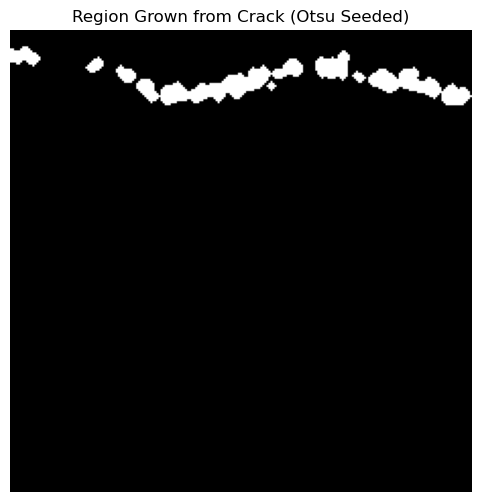

In [53]:
# Convert region_mask to uint8 format for visualization
region_mask = (region_mask * 255).astype(np.uint8)

# Display results
plt.figure(figsize=(6, 6))
plt.imshow(region_mask, cmap='gray')
plt.title("Region Grown from Crack (Otsu Seeded)")
plt.axis("off")
plt.show()

#### Further Enhancment (Post Processing) If needed

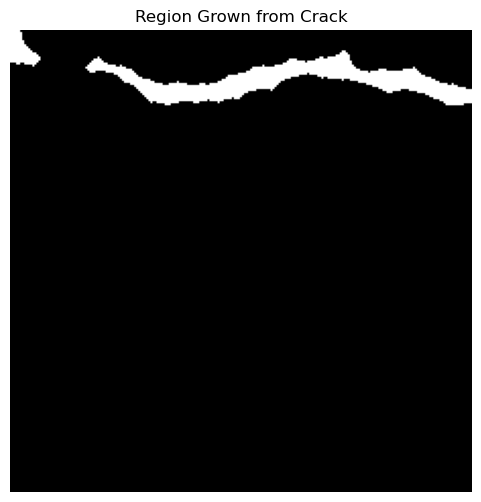

In [54]:
# Apply some Post Processing if needed using Morphological operation
SE = disk(10)
defect_mask = closing(region_mask, SE)


# Display results
plt.figure(figsize=(6, 6))
plt.imshow(defect_mask, cmap='gray')
plt.title("Region Grown from Crack")
plt.axis("off")
plt.show()


**7. Superimposing the Crack on the Original Image.**

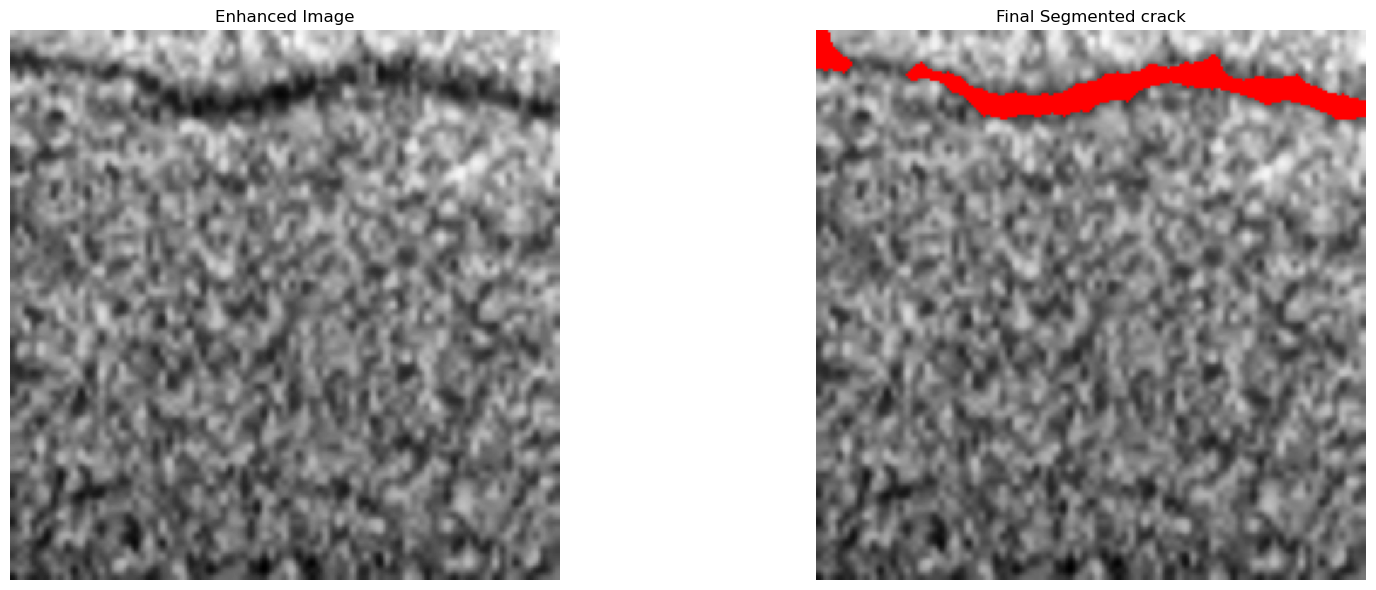

In [55]:
# If no Post Processing is applied change defect_mask to region_mask
# Superimpose optimized seed points onto the original image


seed_overlay = cv2.cvtColor(imageE, cv2.COLOR_GRAY2BGR)

# Replace ### by either 
seed_overlay[defect_mask > 0] = [255, 0, 0]  # Red dots for grown region

# Display results defect_mask or region_mask depend if you applied post processing and changed the name.
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].imshow(imageE, cmap='gray')
axes[0].set_title("Enhanced Image")
axes[0].axis("off")

axes[1].imshow(seed_overlay)
axes[1].set_title("Final Segmented crack")
axes[1].axis("off")

 
plt.tight_layout()

# Save the figure
fig.savefig("crack_1_results.png", dpi=300, bbox_inches='tight')

plt.show()

* **Comment on the final results:**
     - Does the detected crack align well with the actual defect?
     - Are there any false positives or missed areas?

 

Nous sommes partiellement satisfait de notre détection: nous avons effectué un fort traitement afin de ne détecter que le "defect", mais nous avons perdus pas mal d'information. Cependant, celà s'aligne parfaitement avec le "defect".
Grace au fort traitement que nous avons effectué, nous n'avons pas de "false positives", cependant, nous avons des "missed areas" (notament sur la partie fine, car nous avons choisis un blocksize trop important pour détecter la partie fine)

# Repeat the same process for the rest of the images. Consider creating a function that you can call once for each image name. Or simple gather all codes in one cell and just change the image name and tune some parameters.

In [56]:
def region_growing_mimg (image_path,save_name_file, blockSize = 91, C = 85, morph_methods = "remove_small_objects",size_o = 15 ,tolerance = 7,  shape = "no", size = 1, size_o_2=64):
    """
    Perform Flood Fill or region growing algorithm.
    Parameters:
    - image_path: Name of your image path
    - save_name_file: Name of your saved image path
    - blockSize: Int defining the local studies area
    - C: Int to substact to le local mean
    - morph_methods: string defining the morphological operation to clean the adaptative_mean.
    - size_o: Int to define min_size or size of the SE for the morphological operation
    - tolerance: Intensity difference tolerance for expansion.
    - shape: String to define morphological operation to connect seed
    - size: Int for the size of the SE
    - size_o_2: Int if we have to process another morphological operation
    Returns:
    - Image superimpose with the detected growing area
    """
    
    # Read and convert image
    image = io.imread(image_path)
    imageE = equalize_adapthist(image) 
    imageE = (imageE*255).astype(np.uint8)

    # Plot the histogram of the new enhanced image
    plt.hist(imageE.flatten(), bins=256, range=(0,256), color='black'); 
    plt.title("Grayscale Histogram"); 
    plt.xlabel("Pixel Intensity"); plt.ylabel("Frequency"); 
    plt.legend(); 
    plt.show()
    
    # Apply Adaptive Thresholding.
    adaptive_mean = cv2.adaptiveThreshold(imageE, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=blockSize, C=C)

    # Hint: We will inverse the results by taking 255-output, so that Foreground are TRUE and Background are FALSE.
    adaptive_mean = 255-adaptive_mean
    
    # Transform into True and False (Boolean)
    adaptive_mean = adaptive_mean.astype(bool)

    # Display the obtained mask
    plt.figure(figsize=(18, 6))

    plt.imshow(adaptive_mean, cmap='gray')
    plt.title("adaptive mean mask")
    plt.axis("off")
    
    plt.tight_layout()
    plt.show()

    if morph_methods == "opening":
        SE = disk(size_o)
        adaptive_mean_cleaned = opening(adaptive_mean,SE)
        
        # Display the obtained mask
        plt.figure(figsize=(18, 6))

        plt.imshow(adaptive_mean_cleaned, cmap='gray')
        plt.title("adaptive mean cleaned mask")
        plt.axis("off")
        
        plt.tight_layout()
        plt.show()
    elif morph_methods == "remove_small_objects":
        adaptive_mean_cleaned = remove_small_objects(adaptive_mean, min_size= size_o)

        # Display the obtained mask
        plt.figure(figsize=(18, 6))

        plt.imshow(adaptive_mean_cleaned, cmap='gray')
        plt.title("adaptive mean cleaned mask")
        plt.axis("off")
        
        plt.tight_layout()
        plt.show()
    else:
        adaptive_mean_cleaned = adaptive_mean

    if shape == "square":
        SE = cv2.getStructuringElement(cv2.MORPH_RECT,(size,size)) 
        SeedMask = closing(adaptive_mean_cleaned, SE)
    elif shape == "RowRectangle":
        SE = cv2.getStructuringElement(cv2.MORPH_RECT,(2*size,size)) 
        SeedMask = closing(adaptive_mean_cleaned, SE)
    elif shape == "ColumnRectangle":
        SE = cv2.getStructuringElement(cv2.MORPH_RECT,(size,2*size)) 
        SeedMask = closing(adaptive_mean_cleaned, SE)
    elif shape == "Circle":
        SE = disk(size) 
        SeedMask = closing(adaptive_mean_cleaned, SE)
    else:
        SeedMask = adaptive_mean_cleaned

    if morph_methods == "remove_small_objects":
        SeedMask = remove_small_objects(SeedMask, min_size= size_o_2)

    SeedMask = (SeedMask*255).astype(np.uint8)

    labeled_seeds, num_seeds = label(SeedMask.astype(bool), connectivity=2, return_num=True)

    # Create an empty region mask
    region_mask = np.zeros_like(imageE, dtype=bool)

    # Apply Region Growing for each seed component
    for seed_label in range(1, num_seeds + 1):
        seed_points = np.argwhere(labeled_seeds == seed_label)
    
        # Convert first occurrence to a tuple (y, x)
        seed_tuple = tuple(seed_points[0])  
        
        # Apply region growing
        region = Region_Growing(SeedMask, seed_tuple, tolerance=tolerance, connectivity=8)
            
        # Accumulate results in the region mask
        region_mask = np.logical_or(region_mask, region)

    region_mask = (region_mask * 255).astype(np.uint8)

    # Superimpose optimized seed points onto the original image
    seed_overlay = cv2.cvtColor(imageE, cv2.COLOR_GRAY2BGR)

    # Replace ### by either 
    seed_overlay[region_mask > 0] = [255, 0, 0]  # Red dots for grown region

    # Display the image
    fig = plt.figure(figsize=(18, 6))

    plt.imshow(seed_overlay, cmap='gray')
    plt.title("Region growing of your image")
    plt.axis("off")
    
    plt.tight_layout()

    # Save the figure
    fig.savefig(save_name_file, dpi=300, bbox_inches='tight')

    plt.show()

    

# Crack 2

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


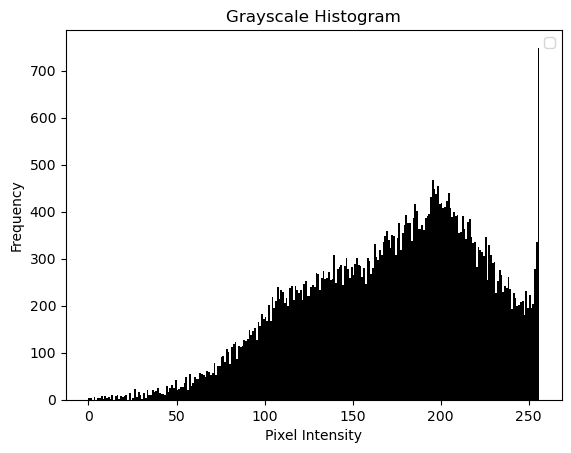

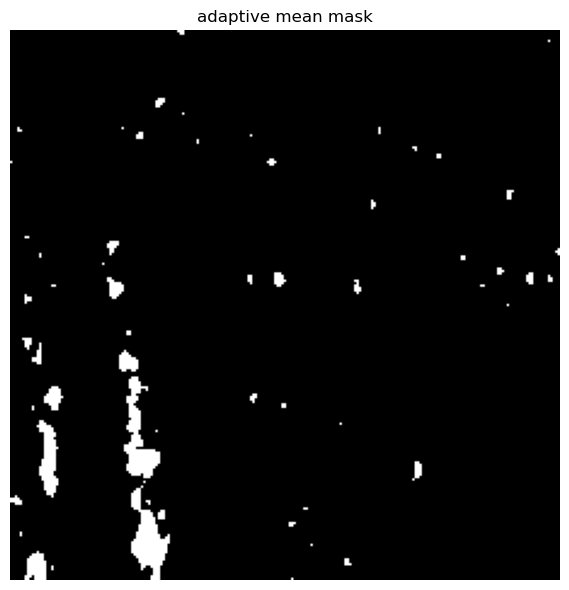

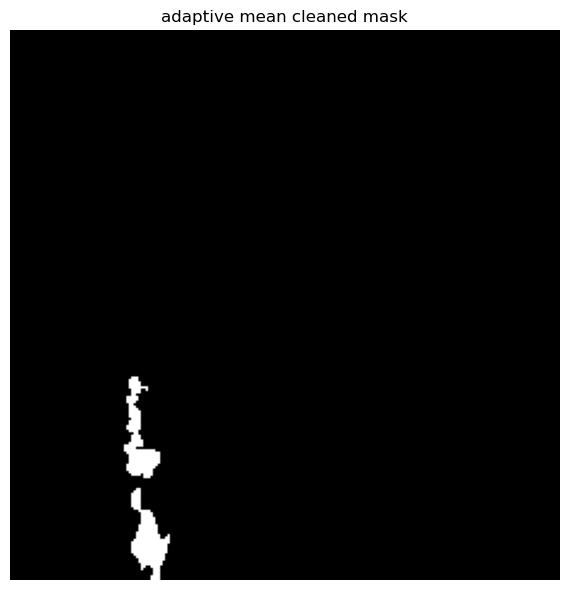

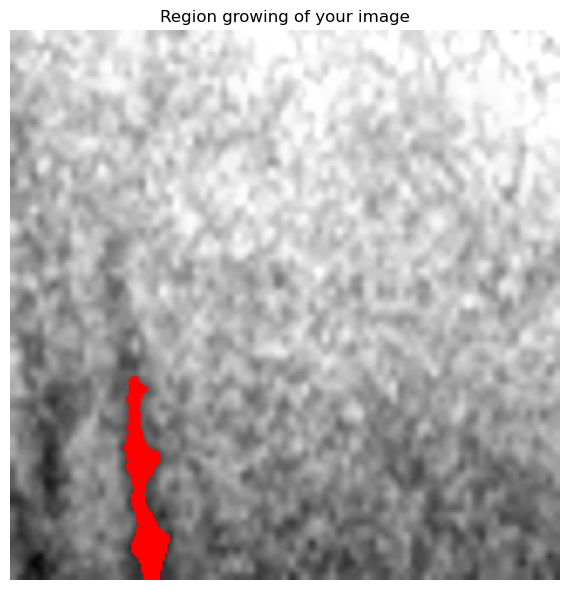

In [57]:
region_growing_mimg("defects/crack2.png","crack_2_results.png", blockSize=71, C=50, morph_methods= "remove_small_objects", size_o = 256, tolerance=15, shape = "Circle",size = 10)

Nous voyons sur l'histograme que, malgrès l'utilisation de "equalize_adapthist", la répartition de l'intensité lumineuse reste inégale. Ainsi, la détection est très sensible au paramètre sur lesquels nous pouvons jouer, notament sur le paramètre C. Afin de ne détecter que notre "defect", il faut effectuer des opérations de post-processing importante sur notre adaptative mean mask. Cependant, nous perdons beaucoup d'information dificile à récupérer avec notre region_growing

# Crack 3

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


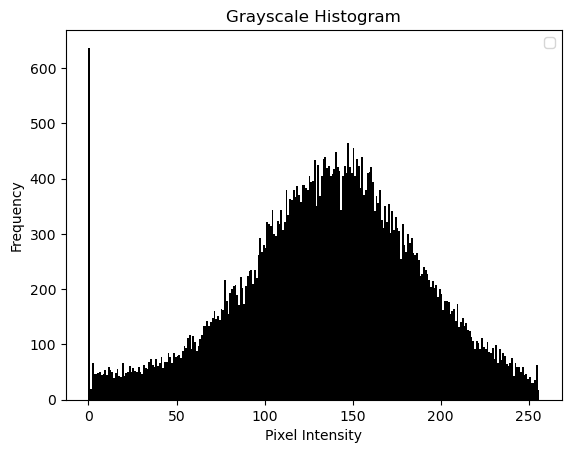

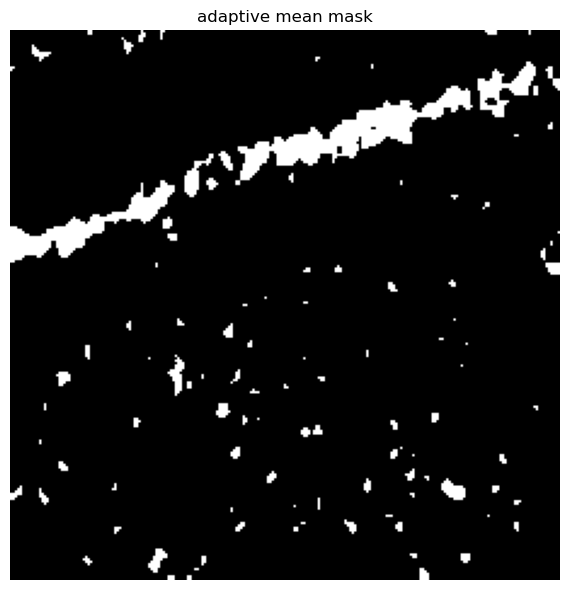

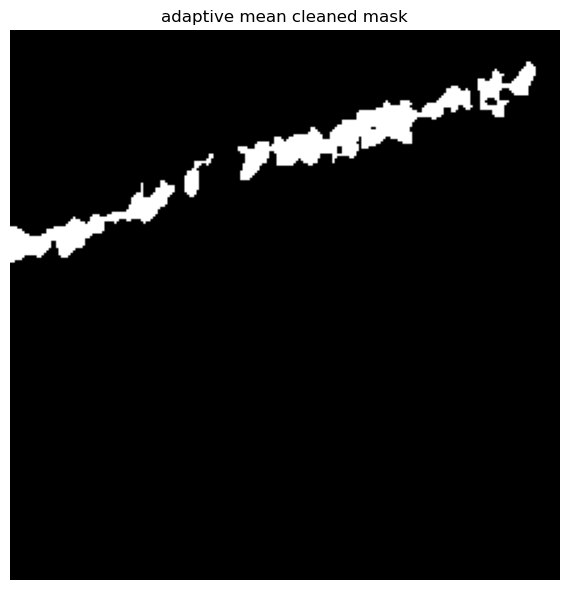

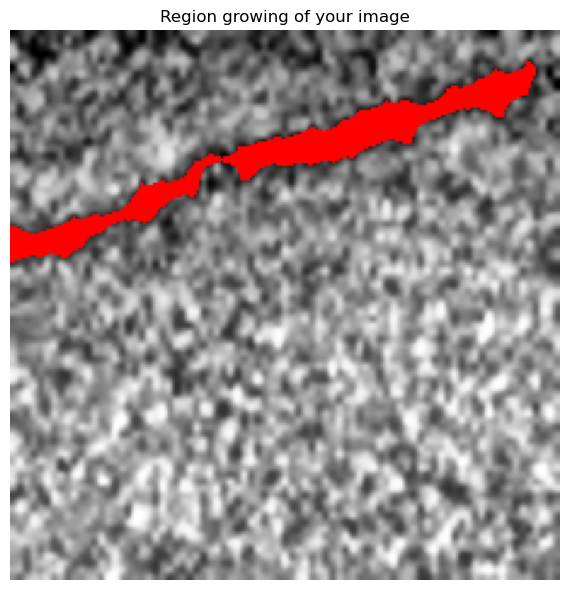

In [58]:
region_growing_mimg("defects/crack3.png","crack_3_results.png", blockSize=111, C=76, morph_methods= "remove_small_objects", size_o = 64, tolerance=20, shape = "Circle", size=8)

# Crack 4

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


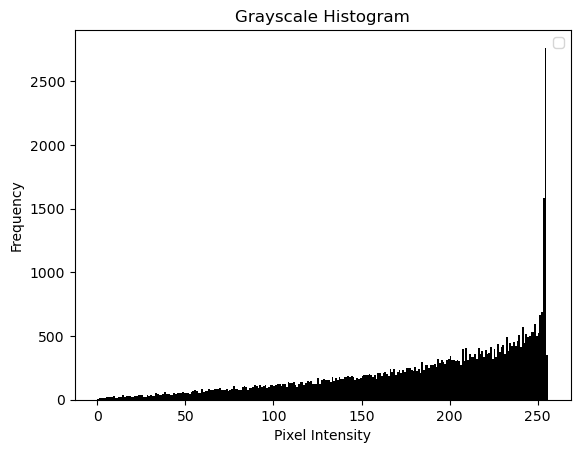

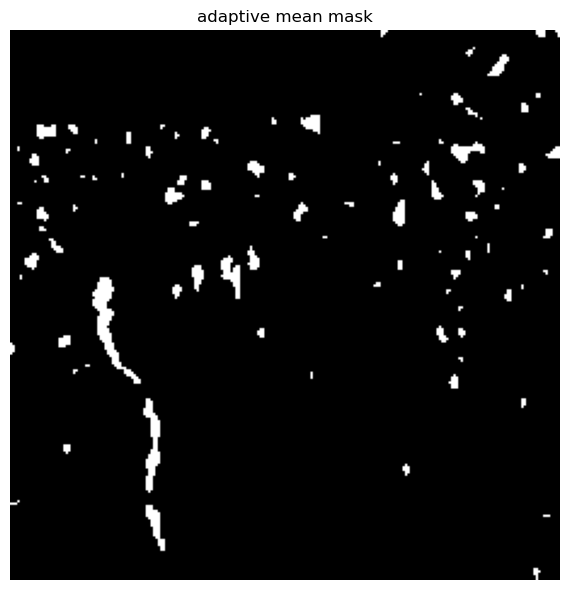

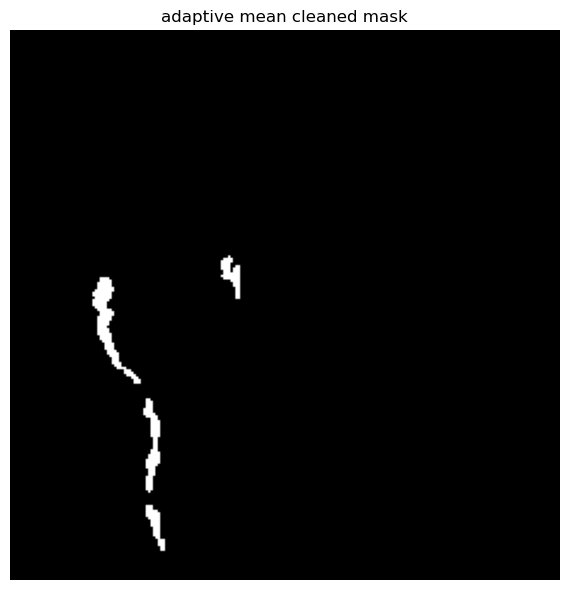

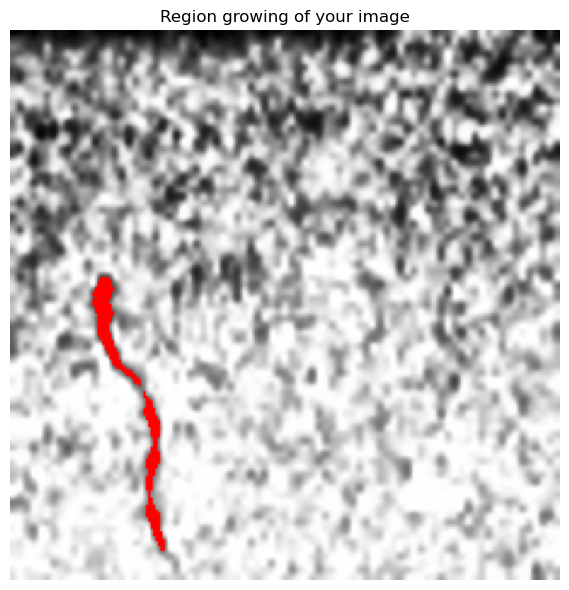

In [59]:
region_growing_mimg("defects/crack4.png","crack_4_results.png", blockSize=91, C=100, morph_methods= "remove_small_objects", size_o=64 ,tolerance=15, shape = "Circle", size=8, size_o_2 = 90)

Le "false positive defect" détecté est trop important pour être effacé, nous perdons trop d'information sur le véritable "defect", due au post-processing effectué sur notre adaptative mean mask (removes small objects avec un min_size > à 64 fait disparaitre), il est donc nécessaire d'effectuer une seconde opération morphologique, après avoir connecté les seed, afin de récupérer toute l'opération.

# Crack 5

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


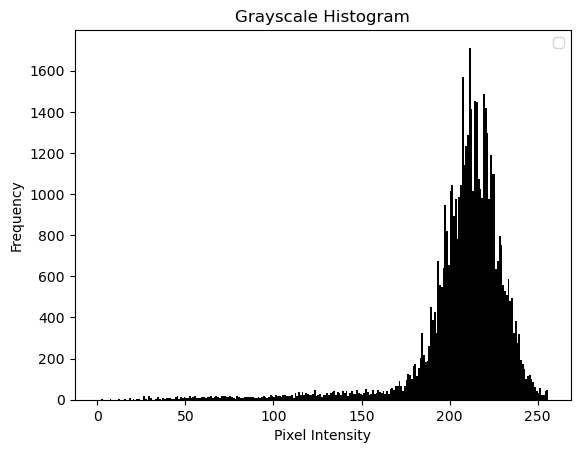

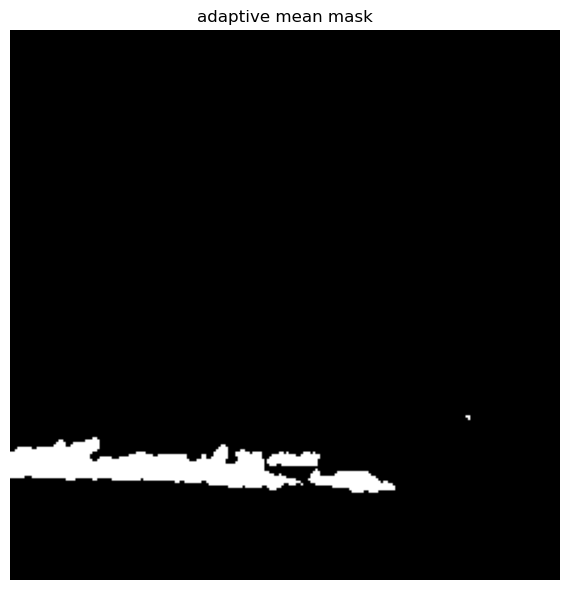

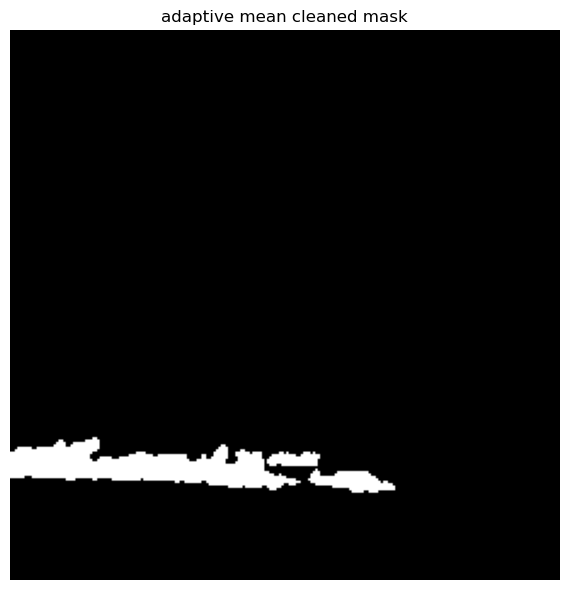

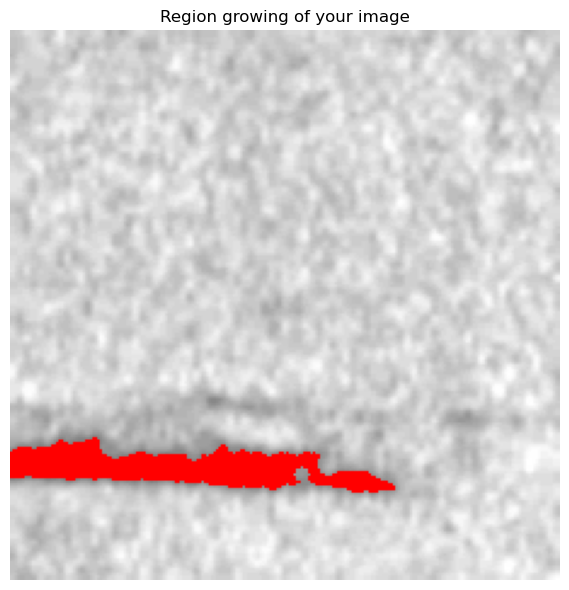

In [60]:
region_growing_mimg("defects/crack5.png","crack_5_results.png", blockSize=91, C=60, morph_methods= "remove_small_objects",tolerance=14, shape = "Circle", size=3)

# Crack 6

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


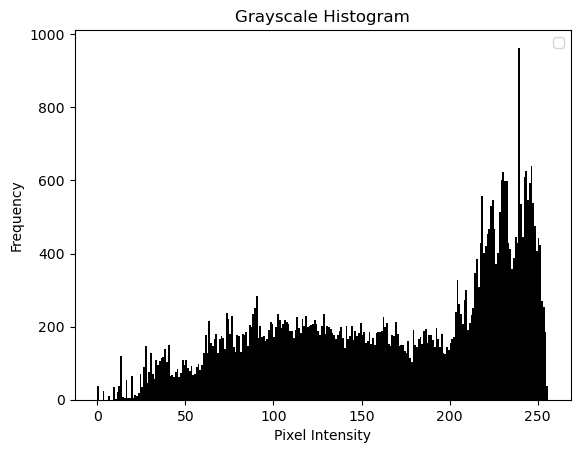

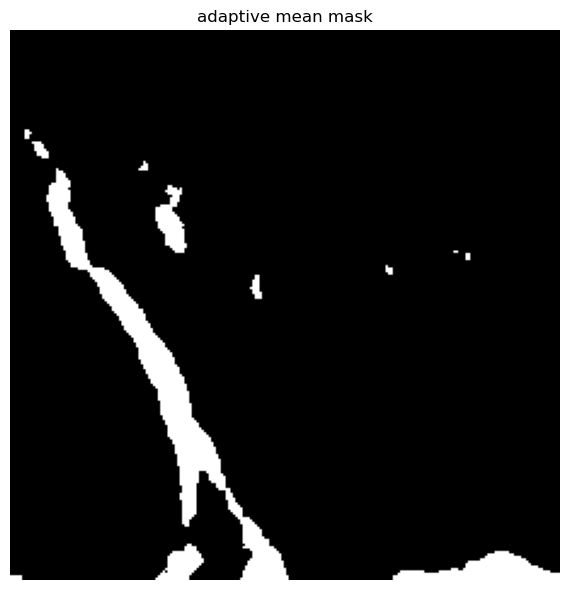

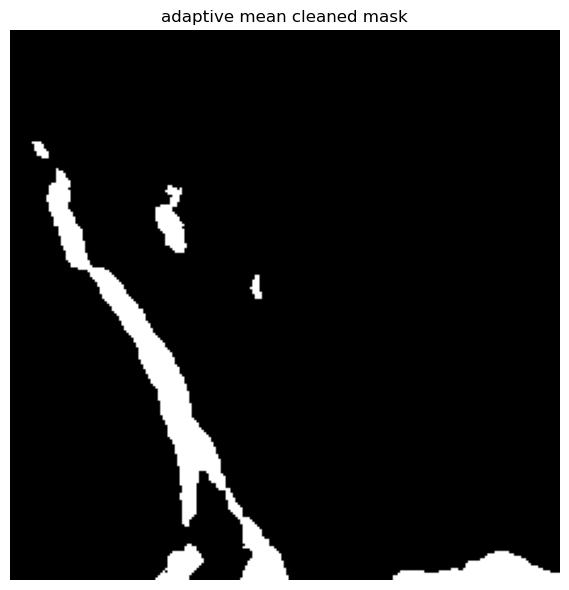

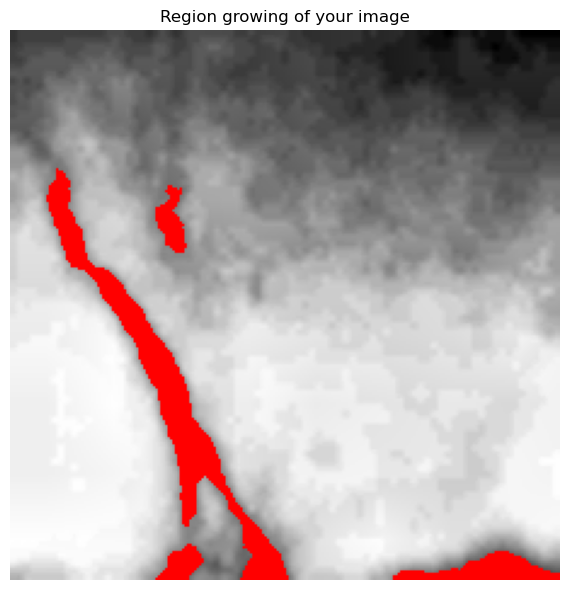

In [61]:
region_growing_mimg("defects/crack6.png","crack_6_results.png", blockSize=51, C=35, morph_methods= "remove_small_objects",tolerance=14, shape = "Circle", size= 2)

9. **Final Analysis: Based on the six identified defects, evaluate the robustness and weaknesses of the method. How well does it handle different defect types? Are there any limitations or inconsistencies in its performance?**

L'enhancement de l'image de départ ne suffit pas pour toutes les images: au vu des histogrammes plot, nous voyons que la fonction "equalize_adapthist" n'est pas adéquate à chaques images. Mais il permet d'être moins sensible au paramètre C, qu'il faut adapter à chaques images. Pour certaines images (3,5,6), nous gardons une répartition convenable, ce qui assure une détection correcte (pas ou peu de false positive, très peu de missed areas). Pour les images 2 et 4, où le defect est nettement plus fin ou très similaire au reste de l'image, la détection est nettement plus dure. Il nous faut alors connecter les seed avant d'effectuer d'autres morphological operation. La robustesse de la methode est alors très faible, sachant qu'il faut jouer sur les nombreux parametres de la fonction, et d'utiliser plusieurs opération morphologique afin d'avoir un résultat convenable.

* **Your Feedback (Optional but highly recommended for improving the BE session)**

  1. Was the session too long or too short?
  2. Did you find it easy or difficult?
  3. Was it engaging or uninteresting?
  4. Did you feel adequately guided throughout the session?
  5. What aspects could be improved?"

La longueure est correcte, cela aborde les différentes méthodes théoriques vu en cours. L'aspect pratique aide grandement à la compréhension, permettant ainsi d'explorer plus en détails les différents paramètres de ces méthodes, ainsi que les limites de ces dernières (aspects positif comme négatif). Cette application à une banque d'image permet de mieux comprendre l'utilité de ces méthodes, nous avons personnelement trouvés ça très intéressant. Les questions sont globalement extrêmement bien guidées, et les encadrants présents lors des séances de BE sont très pédagogue et nous explique nos points d'incompréhensions. Une documentation supplémentaire sur les fonctions déjà importées (où au moins un lien vers la page source) serait bénéfique à la compréhension totale des actions faites (exemple: documentation sur la fonction "cv2.adaptiveThreshold(imageE, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, blockSize=blockSize, C=C)")